<a href="https://colab.research.google.com/github/Buntariga2545/Project/blob/main/Association_Rules_%E0%B9%81%E0%B8%81%E0%B9%89%E0%B8%A5%E0%B9%88%E0%B8%B2%E0%B8%AA%E0%B8%B8%E0%B8%94.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
%config InlineBackend.figure_format='retina'
from sklearn.model_selection import cross_val_score, train_test_split, KFold, StratifiedKFold
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import GridSearchCV
from pandas.api.types import  CategoricalDtype

# machine learning model
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.linear_model import LogisticRegressionCV
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression

In [2]:
!wget -q https://github.com/Phonbopit/sarabun-webfont/raw/master/fonts/thsarabunnew-webfont.ttf
import matplotlib as mpl
mpl.font_manager.fontManager.addfont('thsarabunnew-webfont.ttf')
mpl.rc('font', family='TH Sarabun New')

In [3]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [4]:
data = pd.read_excel('/content/drive/My Drive/Paper/Data-Survey-13-7-2023_1.xlsx', skiprows = 1)
data

,Unnamed: 0,Unnamed: 1,Unnamed: 2,Unnamed: 3,Unnamed: 4,Unnamed: 5,Unnamed: 6,Unnamed: 7,Unnamed: 8,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [5]:
data.rename(columns = {'Unnamed: 0' : 'No', 'Unnamed: 1' : 'Date', 'Unnamed: 2' : 'เพศ', 'Unnamed: 3' : 'Age', 'Unnamed: 4' : 'Weight',
                       'Unnamed: 5' : 'Height', 'Unnamed: 6' : 'BMI', 'Unnamed: 7' : 'พื้นที่ทำแบบสอบถาม', 'Unnamed: 8' : 'เวลา',
                       '%RH' : 'RH','V (m/s)' : 'V','Unnamed: 18' : 'Thermal_acceptance', 'Unnamed: 26' : 'Thermal_sensation_Vote'
                       }, inplace = True)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,2,3,2,0,-1,0,-1,0
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,5,3,1,0,0,1,-1,0
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,4,1,1,0,0,0,0,0
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,3,4,4,2,-1,0,0,-1,1
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,1,4,3,0,-1,-1,0,-1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,4,3,2,-1,1,0,-1,-1
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,1,4,3,4,-1,1,1,-1,-1
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,4,4,4,5,3,-1,-1,1,-1,-1
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,1,5,0,3,-1,1,1,-1,-1


In [ ]:
data.describe()

,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,วงเล็บ 1,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
count,193.000000,193.000000,191.000000,191.000000,191.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000
mean,97.000000,30.720207,68.544503,167.335079,24.364324,30.895337,31.533161,48.780829,0.265311,8.621030e+09,...,2.559585,1.989637,2.414508,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777
std,55.858452,11.950177,22.407397,9.767442,7.126414,2.310264,2.432899,7.491418,0.285395,2.756796e+08,...,1.667028,1.454124,1.404679,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,8.181304e+09,...,0.000000,0.000000,0.000000,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000
25%,49.000000,25.000000,49.000000,158.500000,19.146722,29.100000,29.800000,42.500000,0.120000,8.423330e+09,...,1.000000,1.000000,1.000000,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000
50%,97.000000,27.000000,63.000000,169.000000,22.230987,30.800000,31.800000,46.600000,0.185000,8.647977e+09,...,2.000000,2.000000,2.000000,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000
75%,145.000000,36.000000,76.500000,173.500000,27.548209,32.700000,33.100000,56.100000,0.330000,8.796388e+09,...,4.000000,3.000000,3.000000,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,9.157997e+09,...,6.000000,6.000000,6.000000,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000


#Data Cleaning

จัดการกับค่าว่างด้วย KNN

In [6]:
from sklearn.impute import KNNImputer

imputer = KNNImputer(n_neighbors=5)
imputed = imputer.fit_transform(data[['Weight', 'Height']])
imputed[163:168]


array([[ 78.        , 185.        ],
       [ 65.        , 169.        ],
       [ 68.54450262, 167.33507853],
       [ 64.        , 154.        ],
       [ 65.        , 150.        ]])

In [7]:
imputed[123:130]

array([[ 49.        , 169.        ],
       [ 46.        , 155.        ],
       [ 63.        , 173.        ],
       [ 89.        , 153.        ],
       [ 68.54450262, 167.33507853],
       [ 62.        , 163.        ],
       [ 60.        , 155.        ]])

In [8]:
data.Weight.fillna(68, inplace=True)
data.Height.fillna(167, inplace=True)

In [9]:
BMI1 = 68/(1.67**2)
BMI1

24.38237297859371

In [10]:
data.BMI.fillna(BMI1, inplace=True)

In [11]:
data[125:130]

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ,ความชื้น,กระแสลม,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1
125,126,2023-01-06 00:00:00,ชาย,20,63.0,173.0,21.049818,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,2,4,0,0,4,-1,-1,1,0,0
126,127,2023-01-06 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก / ใต้ร่มไม้,15:44 PM,30.2,...,1,0,1,1,2,0,0,1,0,-1
127,128,13/05/2023,ชาย,57,68.0,167.0,24.382373,ภายใต้อาคาร,11.50 AM,32.7,...,3,4,2,3,3,-1,0,1,0,-1
128,129,13/05/2023,ชาย,56,62.0,163.0,23.335466,ภายใต้อาคาร,11.50 AM,32.7,...,2,3,2,2,0,-1,0,1,-1,0
129,130,13/05/2023,หญิง,60,60.0,155.0,24.973985,ภายใต้อาคาร,11.58 AM,32.2,...,6,3,1,6,5,-1,-1,1,-1,-1


##ดูค่า Outlier

In [ ]:
import matplotlib.pyplot as plt

{'whiskers': [<matplotlib.lines.Line2D at 0x7810f0b9c430>,
 'caps': [<matplotlib.lines.Line2D at 0x7810f0b9ca30>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810f0b9c130>],
 'medians': [<matplotlib.lines.Line2D at 0x7810f0b9d960>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810f0b9d660>],
 'means': []}

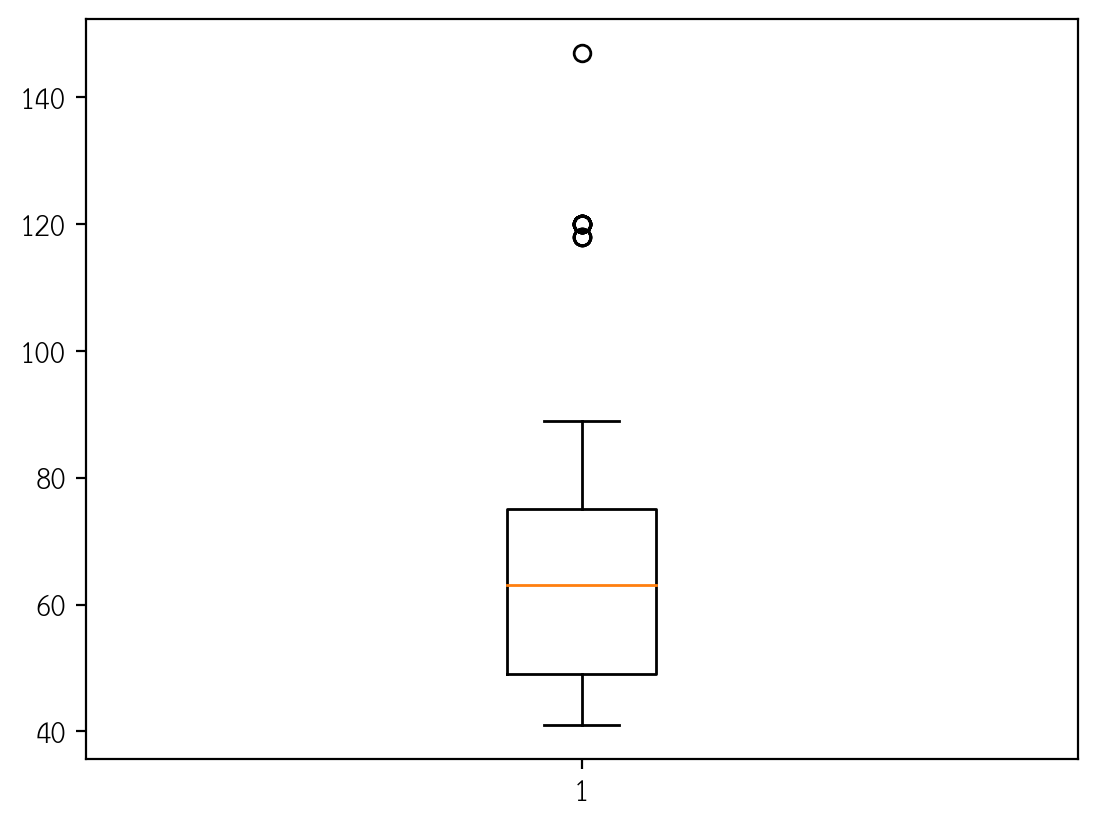

In [ ]:
plt.boxplot(data['Weight'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7810eead41c0>,
 'caps': [<matplotlib.lines.Line2D at 0x7810eead4700>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810eeaa7ee0>],
 'medians': [<matplotlib.lines.Line2D at 0x7810eead4c40>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810eead4ee0>],
 'means': []}

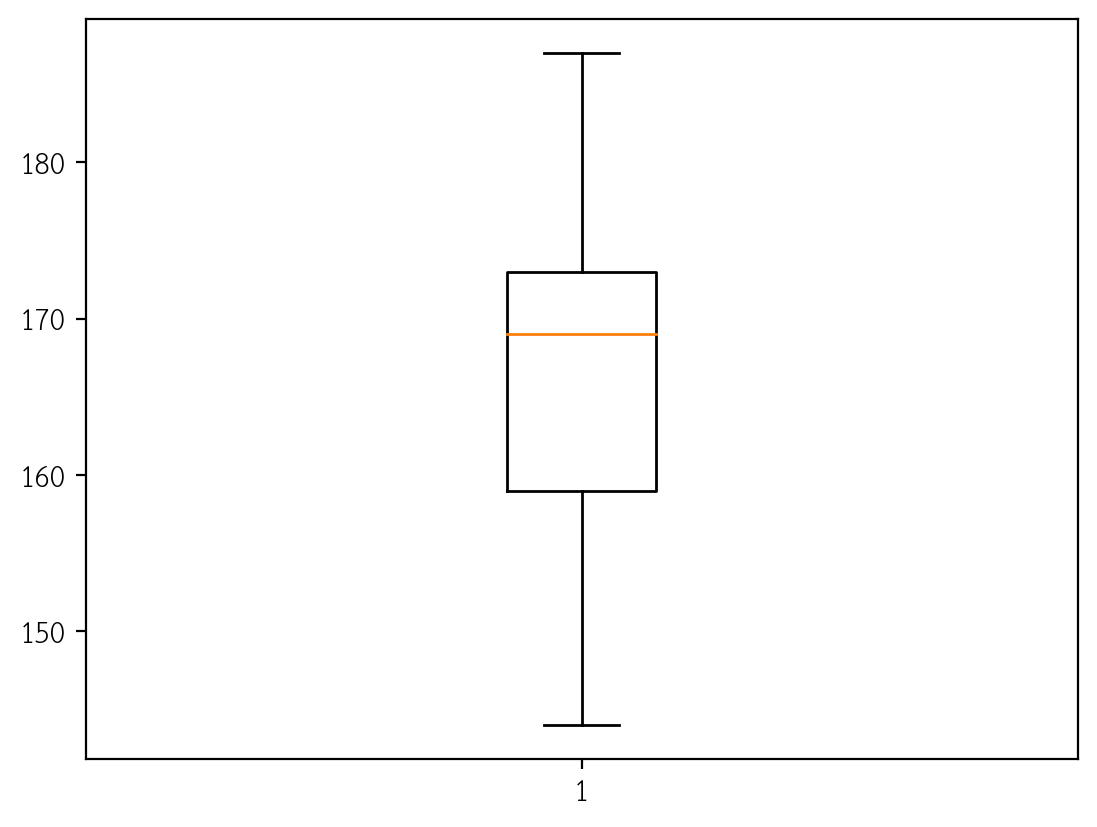

In [ ]:
plt.boxplot(data['Height'])

{'whiskers': [<matplotlib.lines.Line2D at 0x7810eeb2dcc0>,
 'caps': [<matplotlib.lines.Line2D at 0x7810eeb2e200>,
 'boxes': [<matplotlib.lines.Line2D at 0x7810eeb2da20>],
 'medians': [<matplotlib.lines.Line2D at 0x7810eeb2e740>],
 'fliers': [<matplotlib.lines.Line2D at 0x7810eeb2e9e0>],
 'means': []}

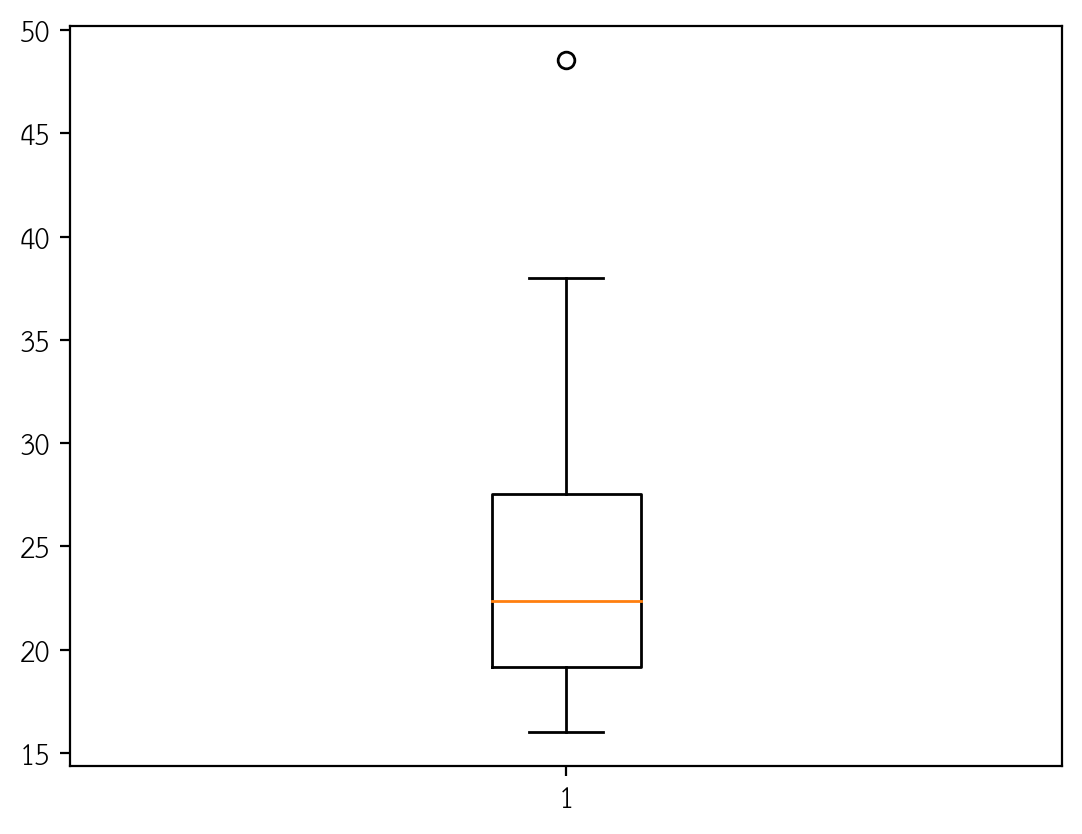

In [ ]:
plt.boxplot(data['BMI'])

#เพิ่มคอลัมน์ค่า TMRT clo และ met ตามลำดับ

In [12]:
data["TMRT"] = data['ยกกำลัง 1 ส่วน 4/ 0.25'] - data['ลบ 273.15']
data["Clo"] = 0.55
data["Met"] =  1.2
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
0,1,2022-12-28 00:00:00,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,2,0,-1,0,-1,0,30.628551,0.55,1.2
1,2,2022-12-28 00:00:00,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,1,0,0,1,-1,0,30.628551,0.55,1.2
2,3,2022-12-28 00:00:00,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,1,0,0,0,0,0,30.628551,0.55,1.2
3,4,2022-12-28 00:00:00,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,4,2,-1,0,0,-1,1,30.628551,0.55,1.2
4,5,2022-12-28 00:00:00,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,3,0,-1,-1,0,-1,0,30.628551,0.55,1.2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,13/05/2023,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,3,2,-1,1,0,-1,-1,36.559615,0.55,1.2
189,190,13/05/2023,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,3,4,-1,1,1,-1,-1,36.559615,0.55,1.2
190,191,13/05/2023,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,5,3,-1,-1,1,-1,-1,36.559615,0.55,1.2
191,192,13/05/2023,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,0,3,-1,1,1,-1,-1,36.559615,0.55,1.2


##drop คอลัมน์ -3 ถึง 3 และคอลัมน์สูตรในการคำนวณหา TMRT ออก

In [13]:
data.drop([-3, -2, -1, 0, '+1', '+2', '+3'], axis=1, inplace=True)

In [14]:
data.drop(['วงเล็บ 1', 'สมการหลัง บวก', 'วงเล็บ 2','ยกกำลัง 1 ส่วน 4/ 0.25', 'ลบ 273.15'  ], axis=1, inplace=True)

##แทนค่าลักษณะของคำที่เหมือนกัน

In [15]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก กลางแจ้ง',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้ร่มไม้',
 'ภายใต้อาคาร'}

In [16]:
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'

<ipython-input-16-daf20139a280>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายใต้ร่มไม้'] = 'ภายนอก / ใต้ร่มไม้'
<ipython-input-16-daf20139a280>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['พื้นที่ทำแบบสอบถาม'][data['พื้นที่ทำแบบสอบถาม']=='ภายนอก กลางแจ้ง'] = 'ภายนอก/ กลางแจ้ง'


In [17]:
set(data['พื้นที่ทำแบบสอบถาม'])

{'ภายนอก / ใต้ร่มไม้',
 'ภายนอก/ กลางแจ้ง',
 'ภายนอก/ มีหลังคาคลุม',
 'ภายใต้อาคาร'}

##เปลี่ยนวันที่เป็น datetime

In [18]:
set(data['Date'])

{'13/05/2023',
 datetime.datetime(2022, 12, 28, 0, 0),
 datetime.datetime(2023, 1, 6, 0, 0),
 datetime.datetime(2023, 1, 8, 0, 0)}

In [19]:
data['Date'] = pd.to_datetime(data.Date)

<ipython-input-19-2e81f6b9fef3>:1: UserWarning: Parsing dates in DD/MM/YYYY format when dayfirst=False (the default) was specified. This may lead to inconsistently parsed dates! Specify a format to ensure consistent parsing.
  data['Date'] = pd.to_datetime(data.Date)


In [20]:
set(data['Date'])

{Timestamp('2022-12-28 00:00:00'),
 Timestamp('2023-01-06 00:00:00'),
 Timestamp('2023-01-08 00:00:00'),
 Timestamp('2023-05-13 00:00:00')}

In [21]:
data['Date'] = pd.to_datetime(data.Date)

In [22]:
conditions = [
    data.Date.dt.month.isin(np.arange(5,10)),
    (data.Date.dt.month.isin(np.arange(1,5))) | (data.Date.dt.month.isin(np.arange(10,13))),
]
choices = ['summer','winter']
data['seasons'] = np.select(conditions, choices)
data

,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met,seasons
0,1,2022-12-28,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,0,-1,0,-1,0,30.628551,0.55,1.2,winter
1,2,2022-12-28,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,1,-1,0,30.628551,0.55,1.2,winter
2,3,2022-12-28,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,1,0,0,0,0,0,30.628551,0.55,1.2,winter
3,4,2022-12-28,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,2,-1,0,0,-1,1,30.628551,0.55,1.2,winter
4,5,2022-12-28,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,0,-1,-1,0,-1,0,30.628551,0.55,1.2,winter
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,2,-1,1,0,-1,-1,36.559615,0.55,1.2,summer
189,190,2023-05-13,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,4,-1,1,1,-1,-1,36.559615,0.55,1.2,summer
190,191,2023-05-13,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,3,-1,-1,1,-1,-1,36.559615,0.55,1.2,summer
191,192,2023-05-13,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,3,-1,1,1,-1,-1,36.559615,0.55,1.2,summer




#histogram
##ของตัวแปร อายุ น้ำหนัก ส่วนสูง ค่า bmi อุณหภูมิ ความชื้นสัมพัทธ์ ความเร็วลม และTMRT

In [23]:
col = ['Age', 'BMI', 'Temp', 'RH', 'V', 'TMRT']

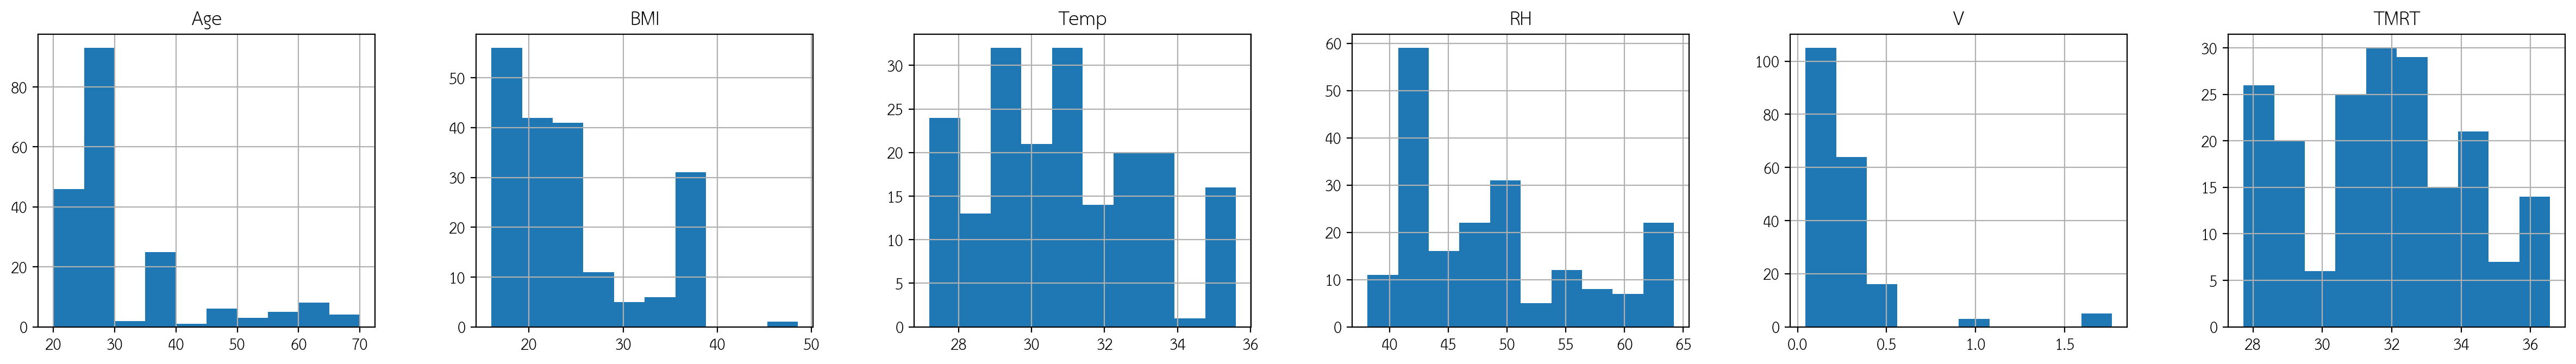

In [24]:
data[col].hist(layout=(1, len(col)), figsize=(5 * len(col), 3.5));

#แบ่งกลุ่มข้อมูล

In [ ]:
data.describe()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No,Age,Weight,Height,BMI,Temp,Globe temp,RH,V,Thermal_sensation_Vote,...,ความแรงของแสงแดด,เหงื่อบริเวณผิวหนัง,ความร้อน,ความชื้น.1,กระแสลม.1,แสงแดด,เหงื่อบริเวณผิวหนัง.1,TMRT,Clo,Met
count,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,...,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,193.000000,1.930000e+02,1.930000e+02
mean,97.000000,30.720207,68.538860,167.331606,24.364511,30.895337,31.533161,48.780829,0.265311,0.507772,...,2.207254,2.129534,-0.647668,-0.103627,0.637306,-0.419689,-0.450777,31.777293,5.500000e-01,1.200000e+00
std,55.858452,11.950177,22.290455,9.716496,7.089200,2.310264,2.432899,7.491418,0.285395,1.229495,...,2.010014,1.941544,0.510522,0.558679,0.543002,0.554363,0.558002,2.489153,1.113110e-16,2.226221e-16
min,1.000000,20.000000,41.000000,144.000000,16.015625,27.200000,27.600000,38.100000,0.045000,-2.000000,...,0.000000,0.000000,-1.000000,-1.000000,-1.000000,-1.000000,-1.000000,27.730857,5.500000e-01,1.200000e+00
25%,49.000000,25.000000,49.000000,159.000000,19.146722,29.100000,29.800000,42.500000,0.120000,0.000000,...,0.000000,0.000000,-1.000000,0.000000,0.000000,-1.000000,-1.000000,30.211258,5.500000e-01,1.200000e+00
50%,97.000000,27.000000,63.000000,169.000000,22.343516,30.800000,31.800000,46.600000,0.185000,0.000000,...,2.000000,2.000000,-1.000000,0.000000,1.000000,0.000000,0.000000,31.939186,5.500000e-01,1.200000e+00
75%,145.000000,36.000000,75.000000,173.000000,27.548209,32.700000,33.100000,56.100000,0.330000,1.000000,...,4.000000,4.000000,0.000000,0.000000,1.000000,0.000000,0.000000,33.219269,5.500000e-01,1.200000e+00
max,193.000000,70.000000,147.000000,187.000000,48.553310,35.600000,36.200000,64.200000,1.765000,3.000000,...,6.000000,6.000000,1.000000,1.000000,1.000000,1.000000,1.000000,36.559615,5.500000e-01,1.200000e+00


In [25]:
def convert_to_buckets(Age):
    if 20 <= Age <= 39:
          return 'วัยหนุ่มสาว'
    elif 40 <= Age <= 59:
          return 'วัยกลางคน'
    else:
        return 'วัยชรา'

In [26]:
data['age_cat']=data['Age'].map(convert_to_buckets)
data['age_cat'].value_counts()

วัยหนุ่มสาว    166
วัยกลางคน       15
วัยชรา          12
Name: age_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

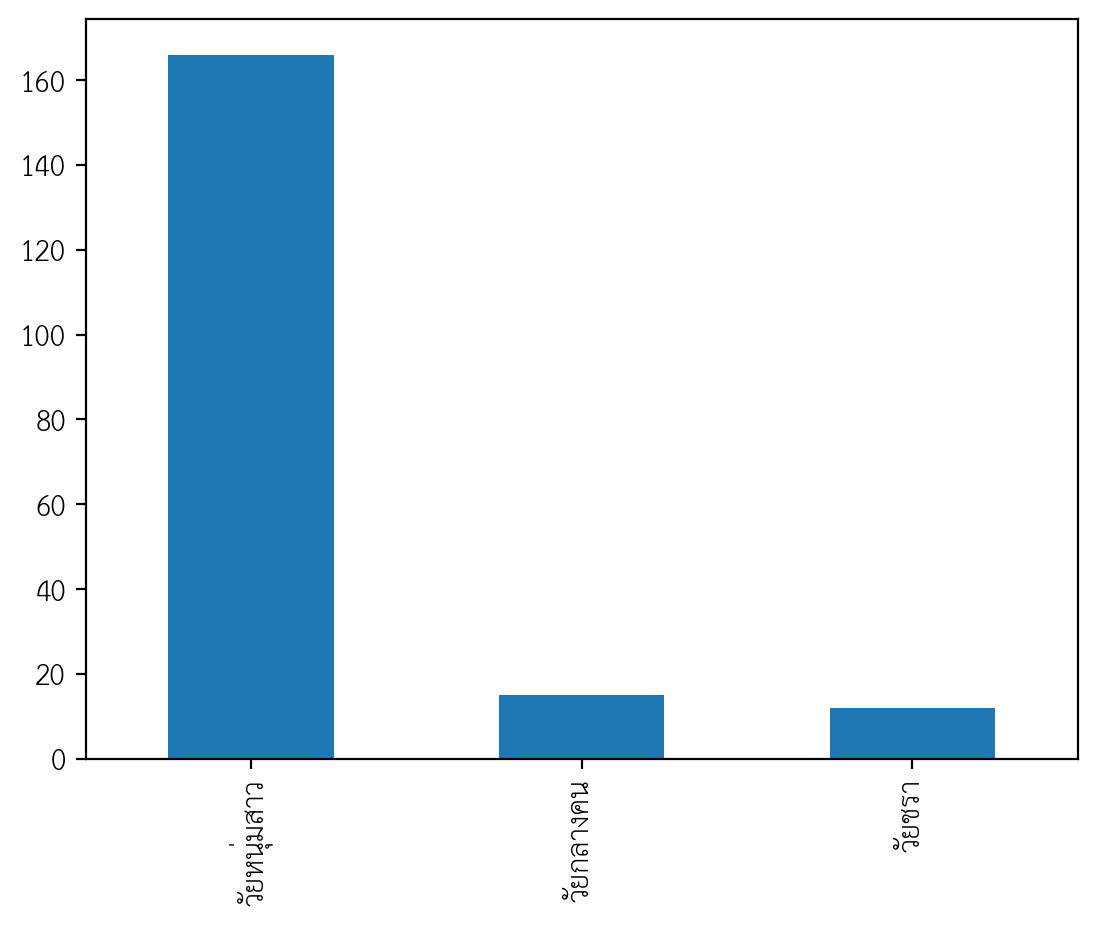

In [ ]:
data['age_cat'].value_counts().plot(kind='bar')

In [27]:
def convert_to_buckets(V):
    if V < 0.29:
          return 'ลมสงบ'
    elif V < 1.6:
          return 'ลมเบา'
    else:
        return 'ลมอ่อน'

In [28]:
data['v_cat']=data['V'].map(convert_to_buckets)
data['v_cat'].value_counts()

ลมสงบ     132
ลมเบา      56
ลมอ่อน      5
Name: v_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

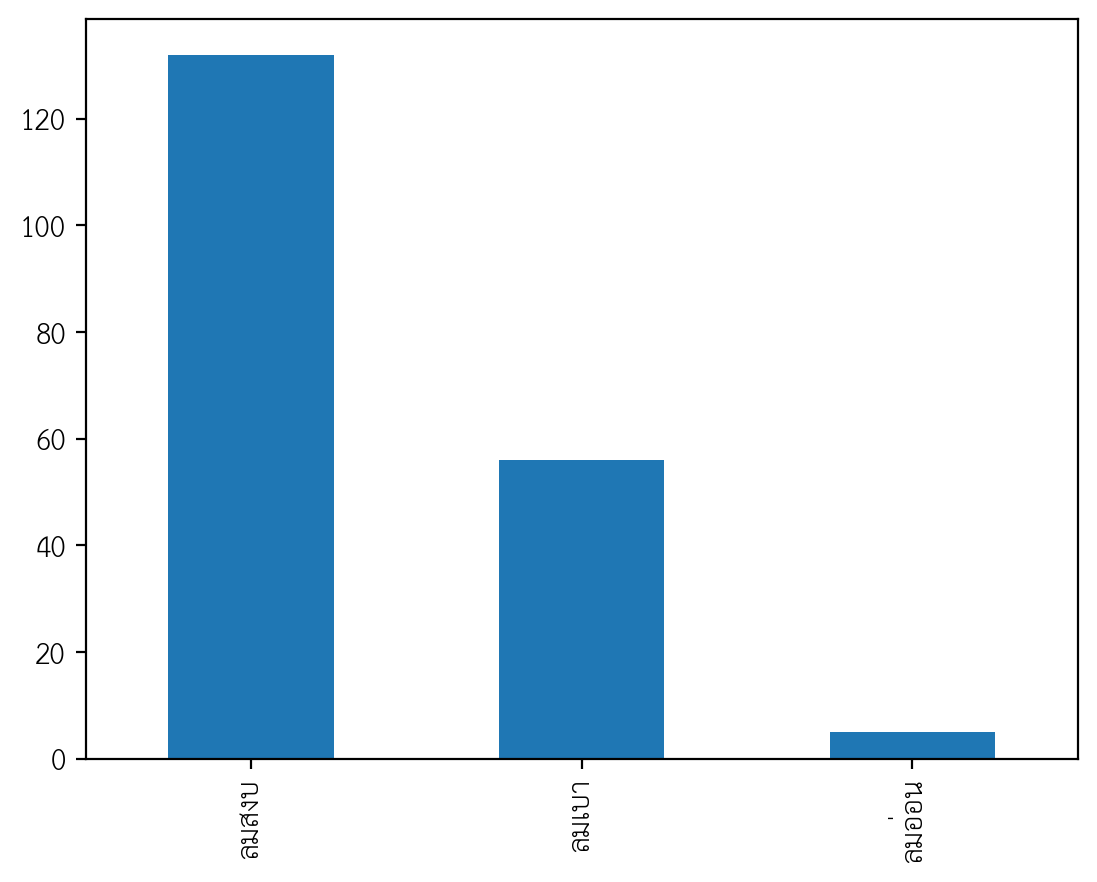

In [ ]:
data['v_cat'].value_counts().plot(kind='bar')

In [29]:
def convert_to_buckets(RH):
    if RH < 40:
          return 'แห้งเกินไป'
    elif RH < 60:
          return 'ความชื้นเหมาะสม'
    else:
        return 'ชื้นเกินไป'

In [30]:
data['rh_cat']=data['RH'].map(convert_to_buckets)
data['rh_cat'].value_counts()

ความชื้นเหมาะสม    163
ชื้นเกินไป          22
แห้งเกินไป           8
Name: rh_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

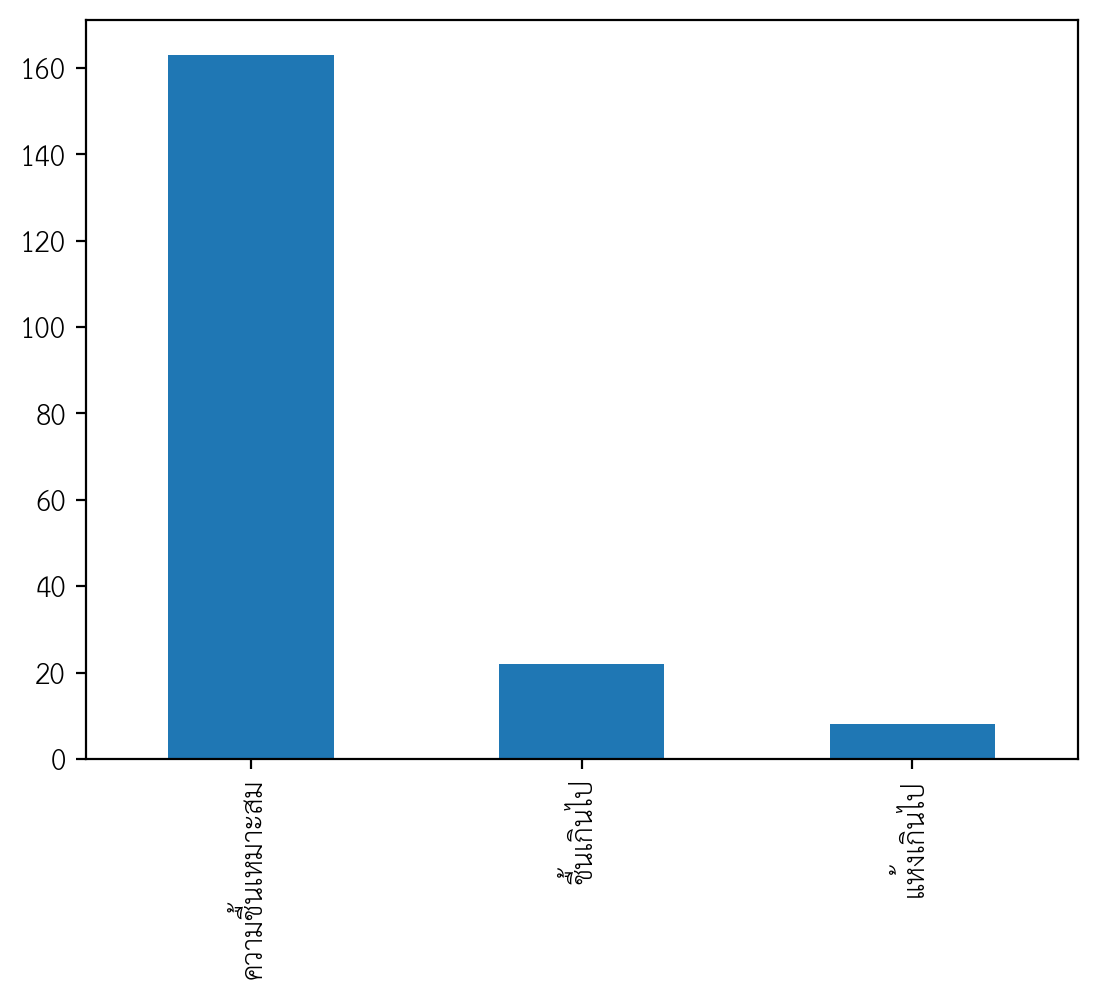

In [ ]:
data['rh_cat'].value_counts().plot(kind='bar')

In [31]:
def convert_to_buckets(BMI):
    if BMI < 18.5:
          return 'น้ำหนักต่ำกว่าเกณฑ์'
    elif 18.5 < BMI <= 22.9:
          return 'สมส่วน'
    elif 23 <= BMI <= 24.9:
          return 'น้ำหนักเกิน'
    elif 25 <= BMI <= 29.9:
          return 'โรคอ้วนระดับที่ 1'
    else:
          return 'โรคอ้วนระดับที่ 2'

In [32]:
data['bmi_cat']= data['BMI'].map(convert_to_buckets)
data['bmi_cat'].value_counts()

สมส่วน                 63
โรคอ้วนระดับที่ 2      41
น้ำหนักต่ำกว่าเกณฑ์    39
น้ำหนักเกิน            36
โรคอ้วนระดับที่ 1      14
Name: bmi_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

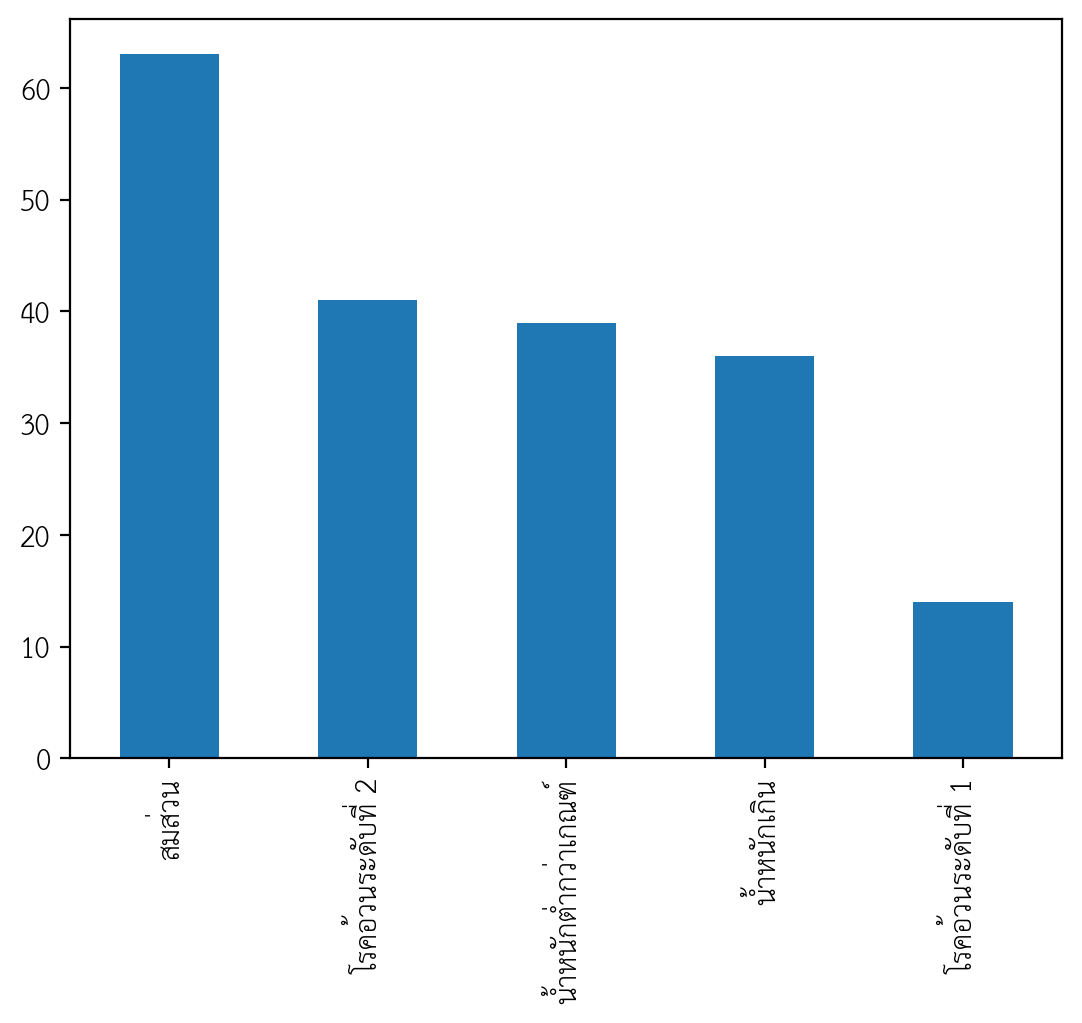

In [ ]:
data['bmi_cat'].value_counts().plot(kind='bar')

In [33]:
def convert_to_buckets(Temp):
    if 23 <= Temp <= 28.9:
          return 'อากาศค่อนข้างเย็น'
    elif 29 <= Temp <= 34.9:
          return 'อากาศค่อนข้างร้อน'
    elif 35.0 <= Temp <= 39.9:
          return 'อากาศร้อน'

In [34]:
data['temp_cat']=data['Temp'].map(convert_to_buckets)
data['temp_cat'].value_counts()

อากาศค่อนข้างร้อน    137
อากาศค่อนข้างเย็น     40
อากาศร้อน             16
Name: temp_cat, dtype: int64

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

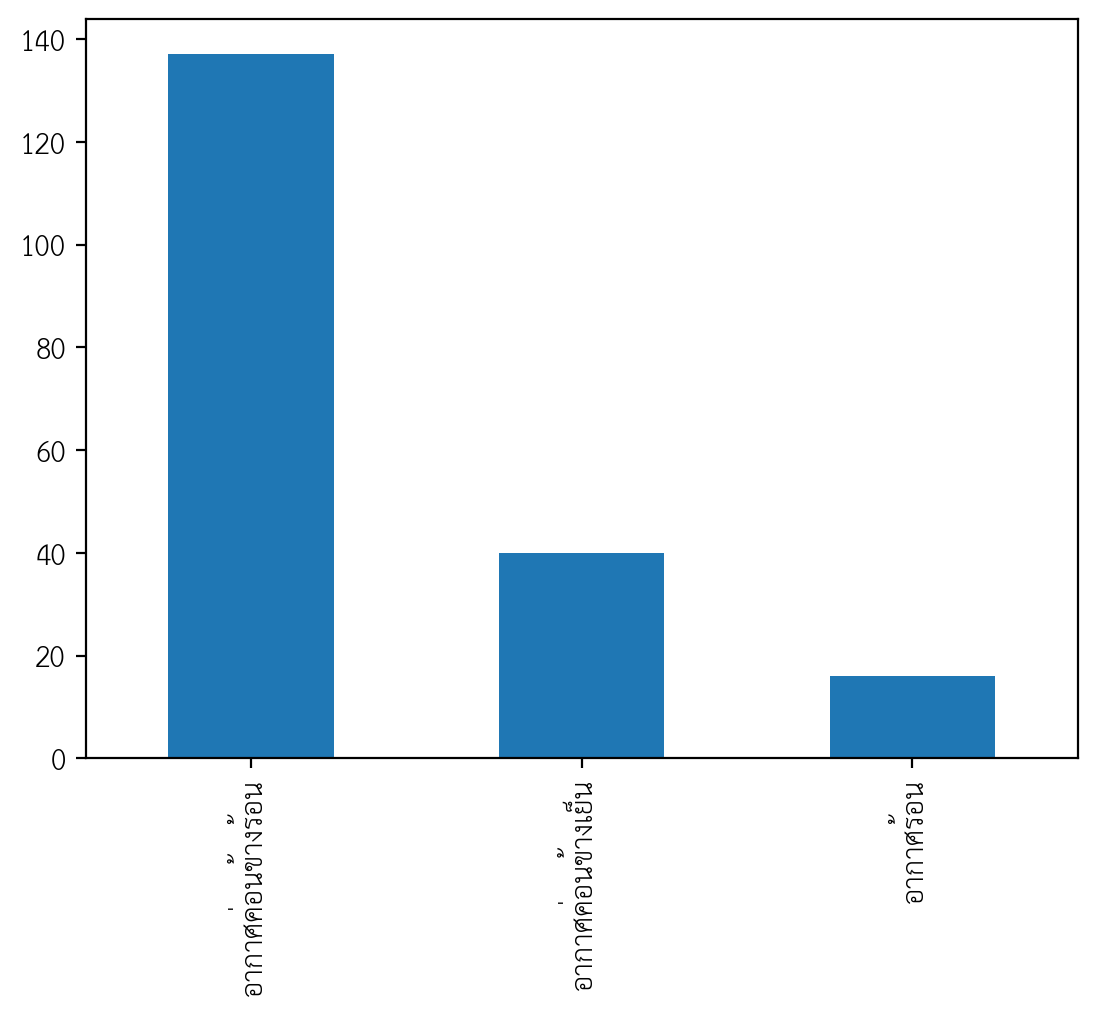

In [ ]:
data['temp_cat'].value_counts().plot(kind='bar')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

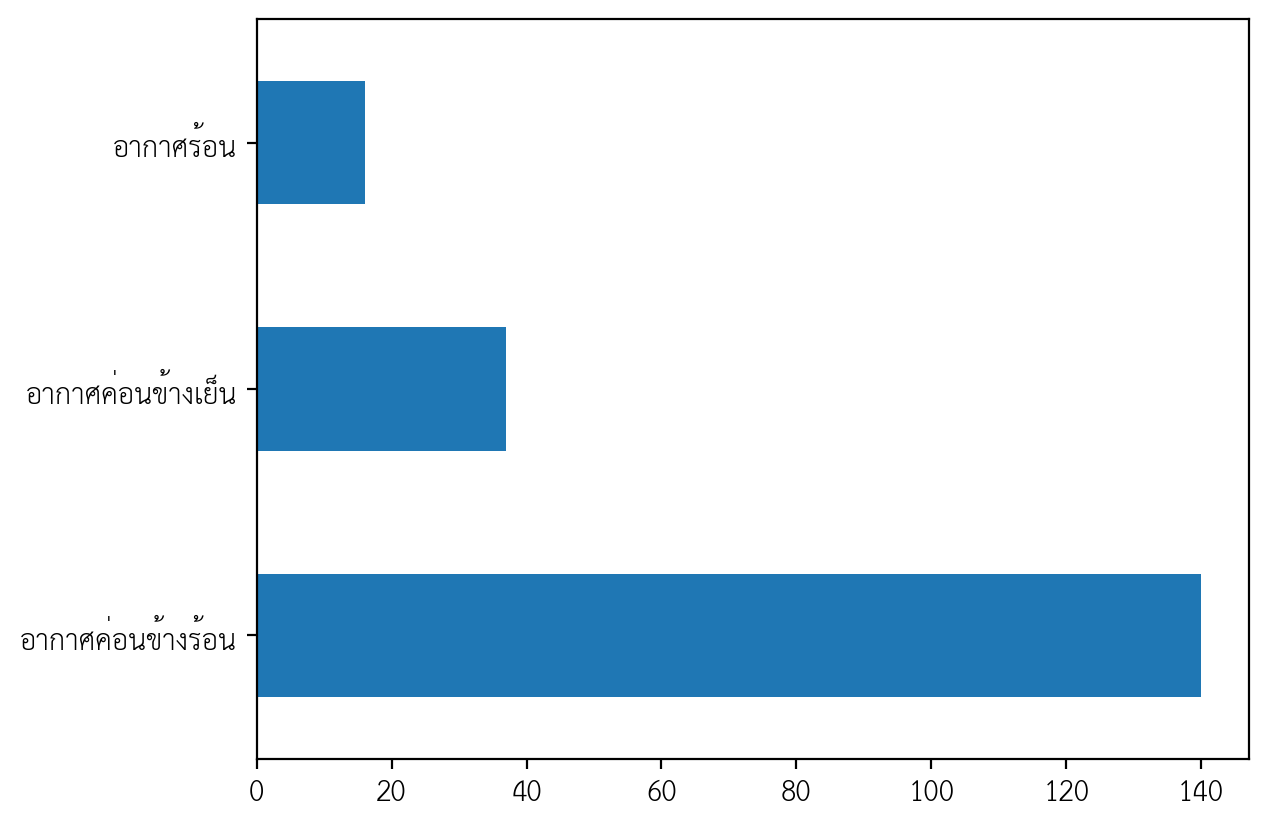

In [ ]:
data['temp_cat'].value_counts().plot(kind='barh')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


<Axes: >

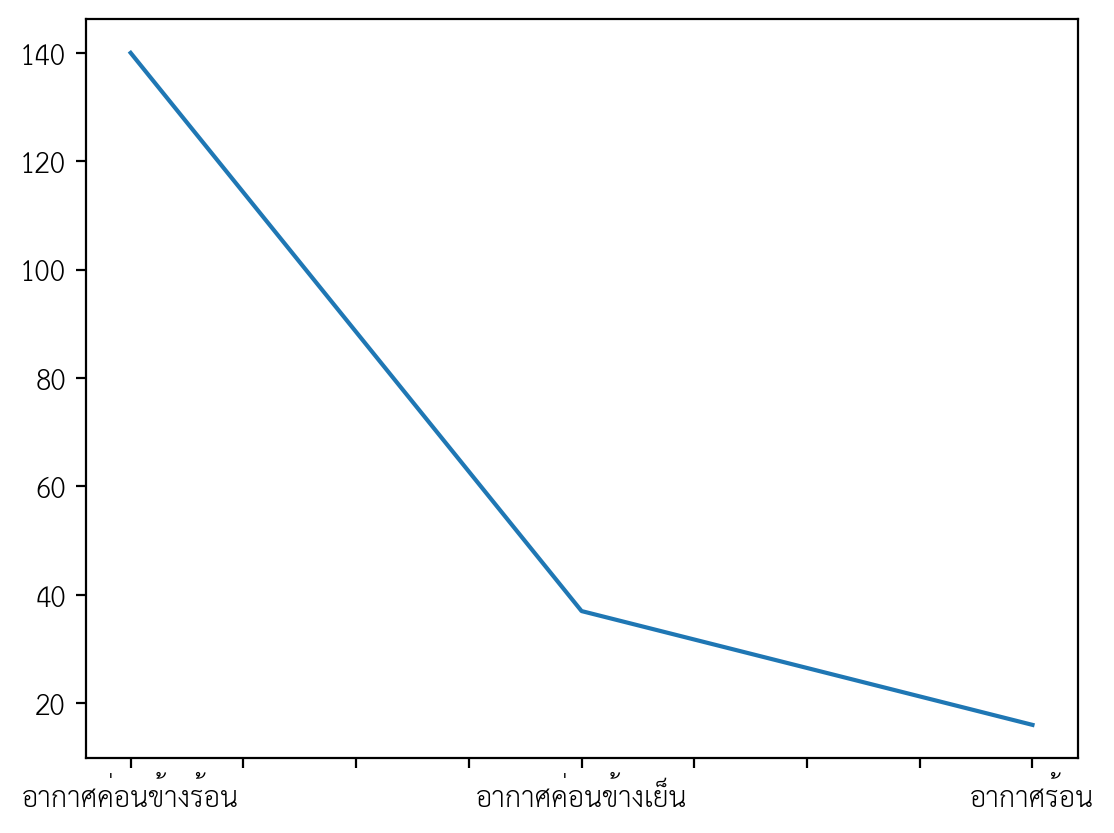

In [ ]:
data['temp_cat'].value_counts().plot()

#Association Rules

In [35]:
!pip install apyori

  Preparing metadata (setup.py) ... done
  Created wheel for apyori: filename=apyori-1.1.2-py3-none-any.whl size=5954 sha256=89e37261da9a6b0e878e38a5b4cb8afea9a7b47857b34220d7c2e598644233d5
  Stored in directory: /root/.cache/pip/wheels/c4/1a/79/20f55c470a50bb3702a8cb7c94d8ada15573538c7f4baebe2d
Successfully built apyori


In [36]:
!pip install mlxtend

In [37]:
from mlxtend.frequent_patterns import apriori, association_rules
import apyori

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 193 entries, 0 to 192
Data columns (total 34 columns):
 #   Column                  Non-Null Count  Dtype         
---  ------                  --------------  -----         
 0   No                      193 non-null    int64         
 1   Date                    193 non-null    datetime64[ns]
 2   เพศ                     193 non-null    object        
 3   Age                     193 non-null    int64         
 4   Weight                  193 non-null    float64       
 5   Height                  193 non-null    float64       
 6   BMI                     193 non-null    float64       
 7   พื้นที่ทำแบบสอบถาม      193 non-null    object        
 8   เวลา                    193 non-null    object        
 9   Temp                    193 non-null    float64       
 10  Globe temp              193 non-null    float64       
 11  RH                      193 non-null    float64       
 12  V                       193 non-null    float64   

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [38]:
fo_mapping = {
    0:'รู้สึกน้อยที่สุด',
    1:'รู้สึกน้อย',
    2:'รู้สึกค่อนข้างน้อย',
    3:'รู้สึกปานกลาง',
    4:'รู้สึกค่อนข้างมาก',
    5:'รู้สึกมาก',
    6:'รู้สึกมากที่สุด'
}

data['อุณหภูมิ(TS)'] = data['อุณหภูมิ'].map(fo_mapping)
data['ความชื้น(TS)'] = data['ความชื้น'].map(fo_mapping)
data['กระแสลม(TS)'] = data['กระแสลม'].map(fo_mapping)
data['ความแรงของแสงแดด(TS)'] = data['ความแรงของแสงแดด'].map(fo_mapping)
data['เหงื่อบริเวณผิวหนัง(TS)'] = data['เหงื่อบริเวณผิวหนัง'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [39]:
fo_mapping = {
    -1 :'ลดน้อยลง',
    0 :'เท่าเดิม',
    1 :'เพิ่มมากขึ้น'
}

data['อุณหภูมิ(PT)'] = data['ความร้อน'].map(fo_mapping)
data['ความชื้น(PT)'] = data['ความชื้น.1'].map(fo_mapping)
data['กระแสลม(PT)'] = data['กระแสลม.1'].map(fo_mapping)
data['ความแรงของแสงแดด(PT)'] = data['แสงแดด'].map(fo_mapping)
data['เหงื่อบริเวณผิวหนัง(PT)'] = data['เหงื่อบริเวณผิวหนัง.1'].map(fo_mapping)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [ ]:
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,No,Date,เพศ,Age,Weight,Height,BMI,พื้นที่ทำแบบสอบถาม,เวลา,Temp,...,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,1,2022-12-28,ชาย,27,49.0,169.0,17.156262,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,รู้สึกค่อนข้างน้อย,รู้สึกน้อย,รู้สึกค่อนข้างน้อย,รู้สึกปานกลาง,รู้สึกค่อนข้างน้อย,เท่าเดิม,ลดน้อยลง,เท่าเดิม,ลดน้อยลง,เท่าเดิม
1,2,2022-12-28,ชาย,36,71.0,175.0,23.183673,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,รู้สึกปานกลาง,รู้สึกน้อยที่สุด,รู้สึกมาก,รู้สึกปานกลาง,รู้สึกน้อย,เท่าเดิม,เท่าเดิม,เพิ่มมากขึ้น,ลดน้อยลง,เท่าเดิม
2,3,2022-12-28,หญิง,25,89.0,153.0,38.019565,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,รู้สึกค่อนข้างน้อย,รู้สึกน้อยที่สุด,รู้สึกค่อนข้างมาก,รู้สึกน้อย,รู้สึกน้อย,เท่าเดิม,เท่าเดิม,เท่าเดิม,เท่าเดิม,เท่าเดิม
3,4,2022-12-28,ชาย,29,75.0,165.0,27.548209,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,รู้สึกปานกลาง,รู้สึกปานกลาง,รู้สึกค่อนข้างมาก,รู้สึกค่อนข้างมาก,รู้สึกค่อนข้างน้อย,ลดน้อยลง,เท่าเดิม,เท่าเดิม,ลดน้อยลง,เพิ่มมากขึ้น
4,5,2022-12-28,ชาย,28,118.0,187.0,33.744173,ภายนอก/ มีหลังคาคลุม,10:55 AM,30.5,...,รู้สึกค่อนข้างน้อย,รู้สึกน้อย,รู้สึกค่อนข้างมาก,รู้สึกปานกลาง,รู้สึกน้อยที่สุด,ลดน้อยลง,ลดน้อยลง,เท่าเดิม,ลดน้อยลง,เท่าเดิม
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
188,189,2023-05-13,ชาย,37,88.0,180.0,27.160494,ภายใต้อาคาร,16.26,35.6,...,รู้สึกปานกลาง,รู้สึกค่อนข้างน้อย,รู้สึกค่อนข้างมาก,รู้สึกปานกลาง,รู้สึกค่อนข้างน้อย,ลดน้อยลง,เพิ่มมากขึ้น,เท่าเดิม,ลดน้อยลง,ลดน้อยลง
189,190,2023-05-13,หญิง,23,47.0,159.0,18.591037,ภายใต้อาคาร,16.26,35.6,...,รู้สึกปานกลาง,รู้สึกน้อย,รู้สึกค่อนข้างมาก,รู้สึกปานกลาง,รู้สึกค่อนข้างมาก,ลดน้อยลง,เพิ่มมากขึ้น,เพิ่มมากขึ้น,ลดน้อยลง,ลดน้อยลง
190,191,2023-05-13,ชาย,27,47.0,169.0,16.456006,ภายใต้อาคาร,16.26,35.6,...,รู้สึกค่อนข้างมาก,รู้สึกค่อนข้างมาก,รู้สึกค่อนข้างมาก,รู้สึกมาก,รู้สึกปานกลาง,ลดน้อยลง,ลดน้อยลง,เพิ่มมากขึ้น,ลดน้อยลง,ลดน้อยลง
191,192,2023-05-13,ชาย,57,68.0,171.0,23.255019,ภายใต้อาคาร,16.26,35.6,...,รู้สึกปานกลาง,รู้สึกน้อย,รู้สึกมาก,รู้สึกน้อยที่สุด,รู้สึกปานกลาง,ลดน้อยลง,เพิ่มมากขึ้น,เพิ่มมากขึ้น,ลดน้อยลง,ลดน้อยลง


In [ ]:
data.columns

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Index(['No', 'Date', 'เพศ', 'Age', 'Weight', 'Height', 'BMI',
       'พื้นที่ทำแบบสอบถาม', 'เวลา', 'Temp', 'Globe temp', 'RH', 'V',
       'Thermal_acceptance', 'Thermal_sensation_Vote', 'อุณหภูมิ', 'ความชื้น',
       'กระแสลม', 'ความแรงของแสงแดด', 'เหงื่อบริเวณผิวหนัง', 'ความร้อน',
       'ความชื้น.1', 'กระแสลม.1', 'แสงแดด', 'เหงื่อบริเวณผิวหนัง.1', 'TMRT',
       'Clo', 'Met', 'seasons', 'age_cat', 'v_cat', 'rh_cat', 'bmi_cat',
       'temp_cat', 'อุณหภูมิ(TS)', 'ความชื้น(TS)', 'กระแสลม(TS)',
       'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)',
       'ความชื้น(PT)', 'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)',
       'เหงื่อบริเวณผิวหนัง(PT)'],
      dtype='object')

##Thermal acceptance

In [40]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat',  'พื้นที่ทำแบบสอบถาม','seasons','เพศ','Thermal_acceptance', 'อุณหภูมิ(TS)', 'ความชื้น(TS)',
           'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)', 'กระแสลม(PT)', 'ความแรงของแสงแดด(PT)',
           'เหงื่อบริเวณผิวหนัง(PT)']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [41]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,พื้นที่ทำแบบสอบถาม,seasons,เพศ,Thermal_acceptance,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกค่อนข้างน้อย,รู้สึกน้อย,รู้สึกค่อนข้างน้อย,รู้สึกปานกลาง,รู้สึกค่อนข้างน้อย,เท่าเดิม,ลดน้อยลง,เท่าเดิม,ลดน้อยลง,เท่าเดิม
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกปานกลาง,รู้สึกน้อยที่สุด,รู้สึกมาก,รู้สึกปานกลาง,รู้สึกน้อย,เท่าเดิม,เท่าเดิม,เพิ่มมากขึ้น,ลดน้อยลง,เท่าเดิม
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,หญิง,Accept,รู้สึกค่อนข้างน้อย,รู้สึกน้อยที่สุด,รู้สึกค่อนข้างมาก,รู้สึกน้อย,รู้สึกน้อย,เท่าเดิม,เท่าเดิม,เท่าเดิม,เท่าเดิม,เท่าเดิม
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกปานกลาง,รู้สึกปานกลาง,รู้สึกค่อนข้างมาก,รู้สึกค่อนข้างมาก,รู้สึกค่อนข้างน้อย,ลดน้อยลง,เท่าเดิม,เท่าเดิม,ลดน้อยลง,เพิ่มมากขึ้น
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ภายนอก/ มีหลังคาคลุม,winter,ชาย,Accept,รู้สึกค่อนข้างน้อย,รู้สึกน้อย,รู้สึกค่อนข้างมาก,รู้สึกปานกลาง,รู้สึกน้อยที่สุด,ลดน้อยลง,ลดน้อยลง,เท่าเดิม,ลดน้อยลง,เท่าเดิม


In [42]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [43]:
from mlxtend.preprocessing import TransactionEncoder
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Accept,Unaccept,summer,winter,ความชื้นเหมาะสม,ชาย,ชื้นเกินไป,น้ำหนักต่ำกว่าเกณฑ์,น้ำหนักเกิน,ภายนอก / ใต้ร่มไม้,...,สมส่วน,หญิง,อากาศค่อนข้างร้อน,อากาศค่อนข้างเย็น,อากาศร้อน,เท่าเดิม,เพิ่มมากขึ้น,แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,True,False,False,True,True,True,False,True,False,False,...,False,False,True,False,False,True,False,False,False,False
1,True,False,False,True,True,True,False,False,True,False,...,False,False,True,False,False,True,True,False,False,False
2,True,False,False,True,True,False,False,False,False,False,...,False,True,True,False,False,True,False,False,False,True
3,True,False,False,True,True,True,False,False,False,False,...,False,False,True,False,False,True,True,False,True,False
4,True,False,False,True,True,True,False,False,False,False,...,False,False,True,False,False,True,False,False,False,True


In [44]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
Accept,0.890625
วัยหนุ่มสาว,0.864583
ความชื้นเหมาะสม,0.843750
เท่าเดิม,0.828125
ลดน้อยลง,0.802083
เพิ่มมากขึ้น,0.729167
อากาศค่อนข้างร้อน,0.713542
ลมสงบ,0.687500
winter,0.661458
ชาย,0.651042


##mini sup

In [45]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.109375,(Unaccept)
2,0.338542,(summer)
3,0.661458,(winter)
4,0.843750,(ความชื้นเหมาะสม)
...,...,...
23309,0.119792,"(เพิ่มมากขึ้น, ลดน้อยลง, ชาย, วัยหนุ่มสาว, Acc..."
23310,0.114583,"(เพิ่มมากขึ้น, ลดน้อยลง, ชาย, วัยหนุ่มสาว, อาก..."
23311,0.125000,"(เพิ่มมากขึ้น, ลดน้อยลง, ชาย, วัยหนุ่มสาว, อาก..."
23312,0.109375,"(เพิ่มมากขึ้น, ลดน้อยลง, ชาย, วัยหนุ่มสาว, อาก..."


In [46]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.338542,(summer)
2,0.661458,(winter)
3,0.843750,(ความชื้นเหมาะสม)
4,0.651042,(ชาย)
...,...,...
5853,0.218750,"(ลดน้อยลง, วัยหนุ่มสาว, Accept, รู้สึกค่อนข้าง..."
5854,0.208333,"(ลดน้อยลง, วัยหนุ่มสาว, อากาศค่อนข้างร้อน, Acc..."
5855,0.203125,"(ลดน้อยลง, วัยหนุ่มสาว, Accept, รู้สึกค่อนข้าง..."
5856,0.218750,"(ลดน้อยลง, วัยหนุ่มสาว, อากาศค่อนข้างร้อน, Acc..."


In [47]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.338542,(summer)
2,0.661458,(winter)
3,0.843750,(ความชื้นเหมาะสม)
4,0.651042,(ชาย)
...,...,...
1663,0.322917,"(ลดน้อยลง, วัยหนุ่มสาว, Accept, เท่าเดิม, wint..."
1664,0.312500,"(ชาย, วัยหนุ่มสาว, Accept, ภายนอก/ มีหลังคาคลุ..."
1665,0.317708,"(ลดน้อยลง, ชาย, วัยหนุ่มสาว, Accept, ภายนอก/ ม..."
1666,0.302083,"(ลดน้อยลง, ชาย, วัยหนุ่มสาว, Accept, รู้สึกน้อ..."


In [48]:
output4 = apriori(df, min_support=0.4, use_colnames=True)
output4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.661458,(winter)
2,0.843750,(ความชื้นเหมาะสม)
3,0.651042,(ชาย)
4,0.557292,(ภายนอก/ มีหลังคาคลุม)
...,...,...
498,0.447917,"(วัยหนุ่มสาว, Accept, รู้สึกน้อย, เท่าเดิม, wi..."
499,0.406250,"(ลดน้อยลง, วัยหนุ่มสาว, Accept, เท่าเดิม, wint..."
500,0.421875,"(วัยหนุ่มสาว, Accept, เท่าเดิม, winter, ความชื..."
501,0.406250,"(ชาย, วัยหนุ่มสาว, Accept, ภายนอก/ มีหลังคาคลุ..."


In [49]:
output5 = apriori(df, min_support=0.5, use_colnames=True)
output5.sort_values("support", ascending = False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
10,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
12,0.828125,(เท่าเดิม)
8,0.802083,(ลดน้อยลง)
39,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
24,0.791667,"(เท่าเดิม, Accept)"
22,0.776042,"(Accept, วัยหนุ่มสาว)"
64,0.750000,"(เท่าเดิม, วัยหนุ่มสาว)"
15,0.750000,"(ความชื้นเหมาะสม, Accept)"


In [ ]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
8,0.864583,(วัยหนุ่มสาว)
2,0.843750,(ความชื้นเหมาะสม)
10,0.828125,(เท่าเดิม)
6,0.802083,(ลดน้อยลง)
20,0.791667,"(เท่าเดิม, Accept)"
26,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
18,0.776042,"(วัยหนุ่มสาว, Accept)"
35,0.750000,"(วัยหนุ่มสาว, เท่าเดิม)"
13,0.750000,"(Accept, ความชื้นเหมาะสม)"


In [ ]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.843750,(ความชื้นเหมาะสม)
2,0.802083,(ลดน้อยลง)
3,0.864583,(วัยหนุ่มสาว)
4,0.713542,(อากาศค่อนข้างร้อน)
5,0.828125,(เท่าเดิม)
6,0.729167,(เพิ่มมากขึ้น)
7,0.750000,"(Accept, ความชื้นเหมาะสม)"
8,0.776042,"(วัยหนุ่มสาว, Accept)"
9,0.791667,"(เท่าเดิม, Accept)"


In [ ]:
output8 = apriori(df, min_support=0.8, use_colnames=oht.columns_)
output8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.890625,(Accept)
1,0.843750,(ความชื้นเหมาะสม)
2,0.802083,(ลดน้อยลง)
3,0.864583,(วัยหนุ่มสาว)
4,0.828125,(เท่าเดิม)


## mini conf

In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf1 = association_rules(output1, metric = "confidence", min_threshold = 0.1)
frequent_conf1

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(summer),(Accept),0.338542,0.890625,0.250000,0.738462,0.829150,-0.051514,0.418199,-0.237523
1,(Accept),(summer),0.890625,0.338542,0.250000,0.280702,0.829150,-0.051514,0.919588,-0.653251
2,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
3,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
4,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
...,...,...,...,...,...,...,...,...,...,...
2810009,(อากาศค่อนข้างร้อน),"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม, winter, ลดน้อ...",0.713542,0.145833,0.114583,0.160584,1.101147,0.010525,1.017572,0.320661
2810010,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม, winter, ลดน้อ...",0.864583,0.114583,0.114583,0.132530,1.156627,0.015516,1.020689,1.000000
2810011,(รู้สึกน้อย),"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม, winter, ลดน้อ...",0.635417,0.145833,0.114583,0.180328,1.236534,0.021918,1.042083,0.524675
2810012,(รู้สึกค่อนข้างน้อย),"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม, winter, ลดน้อ...",0.645833,0.151042,0.114583,0.177419,1.174638,0.017036,1.032067,0.419786


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.2)
frequent_conf2

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(summer),(Accept),0.338542,0.890625,0.250000,0.738462,0.829150,-0.051514,0.418199,-0.237523
1,(Accept),(summer),0.890625,0.338542,0.250000,0.280702,0.829150,-0.051514,0.919588,-0.653251
2,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
3,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
4,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
...,...,...,...,...,...,...,...,...,...,...
304701,(ลดน้อยลง),"(ชาย, ภายนอก/ มีหลังคาคลุม, เท่าเดิม, winter, ...",0.802083,0.218750,0.203125,0.253247,1.157699,0.027669,1.046196,0.688259
304702,(ลมสงบ),"(ชาย, ภายนอก/ มีหลังคาคลุม, เท่าเดิม, winter, ...",0.687500,0.239583,0.203125,0.295455,1.233202,0.038411,1.079301,0.605128
304703,(วัยหนุ่มสาว),"(ชาย, ภายนอก/ มีหลังคาคลุม, เท่าเดิม, winter, ...",0.864583,0.203125,0.203125,0.234940,1.156627,0.027507,1.041585,1.000000
304704,(รู้สึกค่อนข้างน้อย),"(ชาย, ภายนอก/ มีหลังคาคลุม, เท่าเดิม, winter, ...",0.645833,0.255208,0.203125,0.314516,1.232390,0.038303,1.086520,0.532428


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.3)
frequent_conf3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
3,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
4,(ชาย),(Accept),0.651042,0.890625,0.604167,0.928000,1.041965,0.024333,1.519097,0.115414
...,...,...,...,...,...,...,...,...,...,...
37261,(ลดน้อยลง),"(ชาย, เท่าเดิม, วัยหนุ่มสาว, รู้สึกค่อนข้างน้อ...",0.802083,0.338542,0.302083,0.376623,1.112488,0.030545,1.061089,0.510889
37262,(วัยหนุ่มสาว),"(ชาย, เท่าเดิม, ลดน้อยลง, รู้สึกค่อนข้างน้อย, ...",0.864583,0.302083,0.302083,0.349398,1.156627,0.040907,1.072724,1.000000
37263,(รู้สึกค่อนข้างน้อย),"(ชาย, เท่าเดิม, ลดน้อยลง, วัยหนุ่มสาว, Accept,...",0.645833,0.385417,0.302083,0.467742,1.213601,0.053168,1.154672,0.496957
37264,(Accept),"(ชาย, เท่าเดิม, ลดน้อยลง, วัยหนุ่มสาว, รู้สึกค...",0.890625,0.307292,0.302083,0.339181,1.103776,0.028402,1.048258,0.859606


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf4 = association_rules(output4, metric = "confidence", min_threshold = 0.4)
frequent_conf4

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
3,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
4,(ชาย),(Accept),0.651042,0.890625,0.604167,0.928000,1.041965,0.024333,1.519097,0.115414
...,...,...,...,...,...,...,...,...,...,...
5499,(เท่าเดิม),"(ภายนอก/ มีหลังคาคลุม, winter, วัยหนุ่มสาว, รู...",0.828125,0.416667,0.406250,0.490566,1.177358,0.061198,1.145062,0.876457
5500,(winter),"(เท่าเดิม, ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ...",0.661458,0.406250,0.406250,0.614173,1.511811,0.137533,1.538903,1.000000
5501,(วัยหนุ่มสาว),"(เท่าเดิม, ภายนอก/ มีหลังคาคลุม, winter, รู้สึ...",0.864583,0.406250,0.406250,0.469880,1.156627,0.055013,1.120028,1.000000
5502,(รู้สึกน้อย),"(เท่าเดิม, ภายนอก/ มีหลังคาคลุม, winter, วัยหน...",0.635417,0.520833,0.406250,0.639344,1.227541,0.075304,1.328598,0.508425


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf5 = association_rules(output5, metric = "confidence", min_threshold = 0.5)
frequent_conf5.sort_values(['confidence', 'lift'], ascending = False).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
28,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
117,"(ภายนอก/ มีหลังคาคลุม, Accept)",(winter),0.541667,0.661458,0.541667,1.0,1.511811,0.183377,inf,0.738636
333,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
356,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
360,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
362,"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม)",(winter),0.526042,0.661458,0.526042,1.0,1.511811,0.178087,inf,0.714286
538,"(ภายนอก/ มีหลังคาคลุม, Accept, ความชื้นเหมาะสม)",(winter),0.500000,0.661458,0.500000,1.0,1.511811,0.169271,inf,0.677083
579,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม, Accept)",(winter),0.541667,0.661458,0.541667,1.0,1.511811,0.183377,inf,0.738636
586,"(ภายนอก/ มีหลังคาคลุม, Accept)","(วัยหนุ่มสาว, winter)",0.541667,0.661458,0.541667,1.0,1.511811,0.183377,inf,0.738636
593,"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม, Accept)",(winter),0.520833,0.661458,0.520833,1.0,1.511811,0.176324,inf,0.706522


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf6 = association_rules(output6, metric = "confidence", min_threshold = 0.6)
frequent_conf6

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(winter),(Accept),0.661458,0.890625,0.640625,0.968504,1.087443,0.051514,3.472656,0.237523
1,(Accept),(winter),0.890625,0.661458,0.640625,0.719298,1.087443,0.051514,1.206055,0.735192
2,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
3,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
4,(ชาย),(Accept),0.651042,0.890625,0.604167,0.928000,1.041965,0.024333,1.519097,0.115414
...,...,...,...,...,...,...,...,...,...,...
127,"(Accept, ความชื้นเหมาะสม)","(วัยหนุ่มสาว, เท่าเดิม)",0.750000,0.750000,0.656250,0.875000,1.166667,0.093750,2.000000,0.571429
128,(วัยหนุ่มสาว),"(เท่าเดิม, Accept, ความชื้นเหมาะสม)",0.864583,0.677083,0.656250,0.759036,1.121038,0.070855,1.340104,0.797314
129,(เท่าเดิม),"(วัยหนุ่มสาว, Accept, ความชื้นเหมาะสม)",0.828125,0.703125,0.656250,0.792453,1.127044,0.073975,1.430398,0.655844
130,(Accept),"(วัยหนุ่มสาว, เท่าเดิม, ความชื้นเหมาะสม)",0.890625,0.682292,0.656250,0.736842,1.079952,0.048584,1.207292,0.676871


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf7 = association_rules(output7, metric = "confidence", min_threshold = 0.7)
frequent_conf7

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(Accept),(ความชื้นเหมาะสม),0.890625,0.843750,0.750000,0.842105,0.998051,-0.001465,0.989583,-0.017544
1,(ความชื้นเหมาะสม),(Accept),0.843750,0.890625,0.750000,0.888889,0.998051,-0.001465,0.984375,-0.012346
2,(วัยหนุ่มสาว),(Accept),0.864583,0.890625,0.776042,0.897590,1.007821,0.006022,1.068015,0.057305
3,(Accept),(วัยหนุ่มสาว),0.890625,0.864583,0.776042,0.871345,1.007821,0.006022,1.052557,0.070949
4,(เท่าเดิม),(Accept),0.828125,0.890625,0.791667,0.955975,1.073375,0.054118,2.484375,0.397727
5,(Accept),(เท่าเดิม),0.890625,0.828125,0.791667,0.888889,1.073375,0.054118,1.546875,0.625000
6,(วัยหนุ่มสาว),(ความชื้นเหมาะสม),0.864583,0.843750,0.791667,0.915663,1.085230,0.062174,1.852679,0.579960
7,(ความชื้นเหมาะสม),(วัยหนุ่มสาว),0.843750,0.864583,0.791667,0.938272,1.085230,0.062174,2.193750,0.502632
8,(เท่าเดิม),(ความชื้นเหมาะสม),0.828125,0.843750,0.708333,0.855346,1.013743,0.009603,1.080163,0.078877
9,(ความชื้นเหมาะสม),(เท่าเดิม),0.843750,0.828125,0.708333,0.839506,1.013743,0.009603,1.070913,0.086765


In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf8 = association_rules(output8, metric = "confidence", min_threshold = 0.8)
frequent_conf8

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric


##Thermal sensation Vote

In [50]:
cols = ['age_cat', 'bmi_cat', 'temp_cat','rh_cat','v_cat', 'เพศ', 'seasons', 'พื้นที่ทำแบบสอบถาม', 'Thermal_sensation_Vote', 'อุณหภูมิ(TS)',
           'ความชื้น(TS)', 'กระแสลม(TS)', 'ความแรงของแสงแดด(TS)', 'เหงื่อบริเวณผิวหนัง(TS)', 'อุณหภูมิ(PT)', 'ความชื้น(PT)', 'กระแสลม(PT)',
           'ความแรงของแสงแดด(PT)', 'เหงื่อบริเวณผิวหนัง(PT)']
in_df = data[cols]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [51]:
in_df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,age_cat,bmi_cat,temp_cat,rh_cat,v_cat,เพศ,seasons,พื้นที่ทำแบบสอบถาม,Thermal_sensation_Vote,อุณหภูมิ(TS),ความชื้น(TS),กระแสลม(TS),ความแรงของแสงแดด(TS),เหงื่อบริเวณผิวหนัง(TS),อุณหภูมิ(PT),ความชื้น(PT),กระแสลม(PT),ความแรงของแสงแดด(PT),เหงื่อบริเวณผิวหนัง(PT)
0,วัยหนุ่มสาว,น้ำหนักต่ำกว่าเกณฑ์,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,0,รู้สึกค่อนข้างน้อย,รู้สึกน้อย,รู้สึกค่อนข้างน้อย,รู้สึกปานกลาง,รู้สึกค่อนข้างน้อย,เท่าเดิม,ลดน้อยลง,เท่าเดิม,ลดน้อยลง,เท่าเดิม
1,วัยหนุ่มสาว,น้ำหนักเกิน,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1,รู้สึกปานกลาง,รู้สึกน้อยที่สุด,รู้สึกมาก,รู้สึกปานกลาง,รู้สึกน้อย,เท่าเดิม,เท่าเดิม,เพิ่มมากขึ้น,ลดน้อยลง,เท่าเดิม
2,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,หญิง,winter,ภายนอก/ มีหลังคาคลุม,-1,รู้สึกค่อนข้างน้อย,รู้สึกน้อยที่สุด,รู้สึกค่อนข้างมาก,รู้สึกน้อย,รู้สึกน้อย,เท่าเดิม,เท่าเดิม,เท่าเดิม,เท่าเดิม,เท่าเดิม
3,วัยหนุ่มสาว,โรคอ้วนระดับที่ 1,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1,รู้สึกปานกลาง,รู้สึกปานกลาง,รู้สึกค่อนข้างมาก,รู้สึกค่อนข้างมาก,รู้สึกค่อนข้างน้อย,ลดน้อยลง,เท่าเดิม,เท่าเดิม,ลดน้อยลง,เพิ่มมากขึ้น
4,วัยหนุ่มสาว,โรคอ้วนระดับที่ 2,อากาศค่อนข้างร้อน,ความชื้นเหมาะสม,ลมสงบ,ชาย,winter,ภายนอก/ มีหลังคาคลุม,-1,รู้สึกค่อนข้างน้อย,รู้สึกน้อย,รู้สึกค่อนข้างมาก,รู้สึกปานกลาง,รู้สึกน้อยที่สุด,ลดน้อยลง,ลดน้อยลง,เท่าเดิม,ลดน้อยลง,เท่าเดิม


In [52]:
dataset = []
for i in range(0, in_df.shape[0]-1):
    dataset.append([str(in_df.values[i,j]) for j in range(0, in_df.shape[1])])

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [53]:
oht = TransactionEncoder()
oht_ary = oht.fit(dataset).transform(dataset)
df = pd.DataFrame(oht_ary, columns=oht.columns_)
df.head()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,-1,-2,0,1,2,3,summer,winter,ความชื้นเหมาะสม,ชาย,...,สมส่วน,หญิง,อากาศค่อนข้างร้อน,อากาศค่อนข้างเย็น,อากาศร้อน,เท่าเดิม,เพิ่มมากขึ้น,แห้งเกินไป,โรคอ้วนระดับที่ 1,โรคอ้วนระดับที่ 2
0,False,False,True,False,False,False,False,True,True,True,...,False,False,True,False,False,True,False,False,False,False
1,True,False,False,False,False,False,False,True,True,True,...,False,False,True,False,False,True,True,False,False,False
2,True,False,False,False,False,False,False,True,True,False,...,False,True,True,False,False,True,False,False,False,True
3,True,False,False,False,False,False,False,True,True,True,...,False,False,True,False,False,True,True,False,True,False
4,True,False,False,False,False,False,False,True,True,True,...,False,False,True,False,False,True,False,False,False,True


In [54]:
# Product Frequency / Total Sales
first = pd.DataFrame(df.sum() / df.shape[0], columns = ["Support"]).sort_values("Support", ascending = False)
first.sort_values("Support", ascending = True)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,Support
-2,0.020833
ลมอ่อน,0.026042
แห้งเกินไป,0.041667
วัยชรา,0.057292
โรคอ้วนระดับที่ 1,0.072917
อากาศร้อน,0.078125
ภายนอก / ใต้ร่มไม้,0.078125
วัยกลางคน,0.078125
3,0.083333
ภายนอก/ กลางแจ้ง,0.093750


##ตัวเลขที่แสดงสัดส่วน itemsets ที่มีค่า support มากที่สุด ได้แก่ ความชื้นพอเหมาะ (0.84), อากาศค่อนข้างร้อน (0.71), ลมสงบ (0.69), winter (0.69), วัยหนุ่สาว (0.69), เป็นต้น

##mini sup

In [55]:
output1 = apriori(df, min_support=0.1, use_colnames=oht.columns_)
output1.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
23,0.864583,(วัยหนุ่มสาว)
6,0.843750,(ความชื้นเหมาะสม)
28,0.828125,(เท่าเดิม)
20,0.802083,(ลดน้อยลง)
128,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
...,...,...
2174,0.104167,"(summer, ความชื้นเหมาะสม, รู้สึกค่อนข้างมาก, อ..."
5475,0.104167,"(วัยหนุ่มสาว, หญิง, รู้สึกน้อยที่สุด, winter, ..."
7535,0.104167,"(เพิ่มมากขึ้น, สมส่วน, วัยหนุ่มสาว, ภายนอก/ มี..."
2776,0.104167,"(ลดน้อยลง, เท่าเดิม, สมส่วน, winter)"


In [56]:
output2 = apriori(df, min_support=0.2, use_colnames=oht.columns_)
output2.sort_values("support", ascending = True).head(50)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.203125,(-1)
1956,0.203125,"(วัยหนุ่มสาว, รู้สึกปานกลาง, รู้สึกค่อนข้างน้อ..."
1954,0.203125,"(ลดน้อยลง, อากาศค่อนข้างร้อน, รู้สึกปานกลาง, ร..."
1951,0.203125,"(ลดน้อยลง, วัยหนุ่มสาว, รู้สึกค่อนข้างน้อย, รู..."
1908,0.203125,"(เพิ่มมากขึ้น, ภายนอก/ มีหลังคาคลุม, รู้สึกน้อ..."
1860,0.203125,"(ลดน้อยลง, ชาย, อากาศค่อนข้างร้อน, รู้สึกปานกล..."
1839,0.203125,"(เพิ่มมากขึ้น, ชาย, อากาศค่อนข้างร้อน, รู้สึกค..."
1817,0.203125,"(เพิ่มมากขึ้น, ชาย, ภายนอก/ มีหลังคาคลุม, ความ..."
1772,0.203125,"(ลดน้อยลง, เท่าเดิม, รู้สึกน้อยที่สุด, winter,..."
1722,0.203125,"(รู้สึกค่อนข้างน้อย, เท่าเดิม, รู้สึกน้อยที่สุ..."


In [57]:
output3 = apriori(df, min_support=0.3, use_colnames=True)
output3.sort_values("support", ascending = True).head(20)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
0,0.302083,(0)
561,0.302083,"(ความชื้นเหมาะสม, เท่าเดิม, ลมสงบ, รู้สึกน้อยท..."
586,0.302083,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ชาย, รู้สึ..."
593,0.302083,"(ลดน้อยลง, ลมสงบ, ชาย, รู้สึกค่อนข้างน้อย)"
597,0.302083,"(ลมสงบ, วัยหนุ่มสาว, ชาย, รู้สึกค่อนข้างน้อย)"
620,0.302083,"(ลดน้อยลง, ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ..."
623,0.302083,"(ลดน้อยลง, รู้สึกน้อย, ภายนอก/ มีหลังคาคลุม, ว..."
624,0.302083,"(รู้สึกน้อย, ภายนอก/ มีหลังคาคลุม, ลมสงบ, วัยห..."
628,0.302083,"(ลดน้อยลง, ภายนอก/ มีหลังคาคลุม, เท่าเดิม, ลมสงบ)"
629,0.302083,"(ลดน้อยลง, ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว, ..."


##มีค่าตัวแปรตาม tsv สิ้นสุดที่ support = 0.3

In [58]:
output4 = apriori(df, min_support=0.4, use_colnames=True)
output4.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
10,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
12,0.828125,(เท่าเดิม)
8,0.802083,(ลดน้อยลง)
34,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
...,...,...
216,0.401042,"(ความชื้นเหมาะสม, วัยหนุ่มสาว, รู้สึกน้อยที่สุ..."
239,0.401042,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม, วัยหนุ..."
235,0.401042,"(ลดน้อยลง, ลมสงบ, วัยหนุ่มสาว, winter)"
48,0.401042,"(ลดน้อยลง, ภายนอก/ มีหลังคาคลุม)"


In [67]:
output5 = apriori(df, min_support=0.5, use_colnames=True)
output5.sort_values("support", ascending = False).head(35)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
9,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
11,0.828125,(เท่าเดิม)
7,0.802083,(ลดน้อยลง)
26,0.791667,"(ความชื้นเหมาะสม, วัยหนุ่มสาว)"
51,0.750000,"(เท่าเดิม, วัยหนุ่มสาว)"
12,0.729167,(เพิ่มมากขึ้น)
10,0.713542,(อากาศค่อนข้างร้อน)
28,0.708333,"(ความชื้นเหมาะสม, เท่าเดิม)"
8,0.687500,(ลมสงบ)


##Support(Itemset) = 0.5 มี itemsets คือ (วัยหนุ่มสาว, อากาศค่อนข้างร้อน), (ความชื้นเหมาะสม, ลมสงบ), (รู้สึกน้อย, วัยหนุ่มสาว), (เท่าเดิม, ลมสงบ), (เท่าเดิม, อากาศค่อนข้างร้อน) เป็นต้น

In [ ]:
output6 = apriori(df, min_support=0.6, use_colnames=True)
output6.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
7,0.864583,(วัยหนุ่มสาว)
1,0.843750,(ความชื้นเหมาะสม)
9,0.828125,(เท่าเดิม)
5,0.802083,(ลดน้อยลง)
15,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
24,0.750000,"(วัยหนุ่มสาว, เท่าเดิม)"
10,0.729167,(เพิ่มมากขึ้น)
8,0.713542,(อากาศค่อนข้างร้อน)
16,0.708333,"(เท่าเดิม, ความชื้นเหมาะสม)"
6,0.687500,(ลมสงบ)


##Support(Itemset) = 0.6 มี itemsets คือ ลมสงบ, (วัยหนุ่มสาว, ลดน้อยลง), (วัยหนุ่มสาว, เท่าเดิม, ความชื้นเหมาะสม), (ลดน้อยลง, ความชื้นเหมาะสม) เป็นต้น

In [ ]:
output7 = apriori(df, min_support=0.7, use_colnames=True)
output7.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.864583,(วัยหนุ่มสาว)
0,0.843750,(ความชื้นเหมาะสม)
4,0.828125,(เท่าเดิม)
1,0.802083,(ลดน้อยลง)
6,0.791667,"(วัยหนุ่มสาว, ความชื้นเหมาะสม)"
8,0.750000,"(วัยหนุ่มสาว, เท่าเดิม)"
5,0.729167,(เพิ่มมากขึ้น)
3,0.713542,(อากาศค่อนข้างร้อน)
7,0.708333,"(เท่าเดิม, ความชื้นเหมาะสม)"


##Support(Itemset) = 0.7 มี itemsets คือ (วัยหนุ่มสาว, ความชื้นเหมาะสม), (วัยหนุ่มสาว, เท่าเดิม), เพิ่มากขึ้น, อากาศค่อนข้างร้อน, (เท่าเดิม, ความชื้นเหมาะสม)

In [ ]:
output8 = apriori(df, min_support=0.8, use_colnames=True)
output8.sort_values("support", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,support,itemsets
2,0.864583,(วัยหนุ่มสาว)
0,0.843750,(ความชื้นเหมาะสม)
3,0.828125,(เท่าเดิม)
1,0.802083,(ลดน้อยลง)


##Support(Itemset) = 0.8 มี itemsets คือ วัยหนุ่มสาว, ความชื้นพอเหมาะ, เท่าเดิม, ลดน้อยลง

## mini conf

In [ ]:
# Let's view our interpretation values using the Associan rule function.
frequent_conf1 = association_rules(output1, metric = "confidence", min_threshold = 0.1)
frequent_conf1.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
5021,(ชื้นเกินไป),"(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",0.114583,0.229167,0.114583,1.000000,4.363636,0.088325,inf,0.870588
16817,"(summer, ชื้นเกินไป)","(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",0.114583,0.229167,0.114583,1.000000,4.363636,0.088325,inf,0.870588
16822,(ชื้นเกินไป),"(summer, ภายใต้อาคาร, อากาศค่อนข้างร้อน)",0.114583,0.229167,0.114583,1.000000,4.363636,0.088325,inf,0.870588
35716,"(ลดน้อยลง, ชื้นเกินไป)","(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",0.104167,0.229167,0.104167,1.000000,4.363636,0.080295,inf,0.860465
71906,"(summer, ลดน้อยลง, ชื้นเกินไป)","(ภายใต้อาคาร, อากาศค่อนข้างร้อน)",0.104167,0.229167,0.104167,1.000000,4.363636,0.080295,inf,0.860465
...,...,...,...,...,...,...,...,...,...,...
17690,(วัยหนุ่มสาว),"(รู้สึกค่อนข้างมาก, อากาศค่อนข้างร้อน, summer)",0.864583,0.171875,0.104167,0.120482,0.700986,-0.044434,0.941567,-0.759036
73308,(วัยหนุ่มสาว),"(summer, รู้สึกค่อนข้างมาก, ลดน้อยลง, อากาศค่อ...",0.864583,0.171875,0.104167,0.120482,0.700986,-0.044434,0.941567,-0.759036
38788,(วัยหนุ่มสาว),"(ลดน้อยลง, รู้สึกปานกลาง, ภายใต้อาคาร)",0.864583,0.187500,0.104167,0.120482,0.642570,-0.057943,0.923801,-0.804217
72377,(วัยหนุ่มสาว),"(summer, ลดน้อยลง, ภายใต้อาคาร, รู้สึกปานกลาง)",0.864583,0.187500,0.104167,0.120482,0.642570,-0.057943,0.923801,-0.804217


In [ ]:
frequent_conf2 = association_rules(output2, metric = "confidence", min_threshold = 0.2)
frequent_conf2.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
77288,"(เท่าเดิม, ภายนอก/ มีหลังคาคลุม, ลดน้อยลง, เพิ...",(วัยหนุ่มสาว),0.203125,0.864583,0.203125,1.00000,1.156627,0.027507,inf,0.169935
58380,"(ภายนอก/ มีหลังคาคลุม, winter, อากาศค่อนข้างร้...",(วัยหนุ่มสาว),0.208333,0.864583,0.208333,1.00000,1.156627,0.028212,inf,0.171053
61047,"(เท่าเดิม, ภายนอก/ มีหลังคาคลุม, ลดน้อยลง, ลมส...",(winter),0.302083,0.661458,0.302083,1.00000,1.511811,0.102268,inf,0.485075
20541,"(ชาย, เท่าเดิม, winter, รู้สึกปานกลาง)",(วัยหนุ่มสาว),0.218750,0.864583,0.218750,1.00000,1.156627,0.029622,inf,0.173333
17242,"(รู้สึกน้อยที่สุด, ลดน้อยลง, winter, ความชื้นเ...",(วัยหนุ่มสาว),0.265625,0.864583,0.265625,1.00000,1.156627,0.035970,inf,0.184397
...,...,...,...,...,...,...,...,...,...,...
37217,(วัยหนุ่มสาว),"(รู้สึกน้อยที่สุด, ภายนอก/ มีหลังคาคลุม, รู้สึ...",0.864583,0.203125,0.203125,0.23494,1.156627,0.027507,1.041585,1.000000
37668,(วัยหนุ่มสาว),"(ภายนอก/ มีหลังคาคลุม, รู้สึกน้อย, เพิ่มมากขึ้...",0.864583,0.203125,0.203125,0.23494,1.156627,0.027507,1.041585,1.000000
75550,(วัยหนุ่มสาว),"(ชาย, เท่าเดิม, ลมสงบ, เพิ่มมากขึ้น, รู้สึกค่อ...",0.864583,0.213542,0.203125,0.23494,1.100206,0.018500,1.027969,0.672584
37788,(วัยหนุ่มสาว),"(รู้สึกน้อยที่สุด, ภายนอก/ มีหลังคาคลุม, ลมสงบ...",0.864583,0.203125,0.203125,0.23494,1.156627,0.027507,1.041585,1.000000


In [64]:
frequent_conf3 = association_rules(output3, metric = "confidence", min_threshold = 0.3)
frequent_conf3.sort_values(['confidence', 'lift'], ascending = False).head(60)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
8,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
190,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
250,"(ภายนอก/ มีหลังคาคลุม, ชาย)",(winter),0.437500,0.661458,0.437500,1.0,1.511811,0.148112,inf,0.601852
310,"(ภายนอก/ มีหลังคาคลุม, รู้สึกค่อนข้างน้อย)",(winter),0.375000,0.661458,0.375000,1.0,1.511811,0.126953,inf,0.541667
316,"(รู้สึกน้อย, ภายนอก/ มีหลังคาคลุม)",(winter),0.421875,0.661458,0.421875,1.0,1.511811,0.142822,inf,0.585586
322,"(ภายนอก/ มีหลังคาคลุม, รู้สึกน้อยที่สุด)",(winter),0.364583,0.661458,0.364583,1.0,1.511811,0.123427,inf,0.532787
328,"(ลดน้อยลง, ภายนอก/ มีหลังคาคลุม)",(winter),0.401042,0.661458,0.401042,1.0,1.511811,0.135769,inf,0.565217
334,"(ภายนอก/ มีหลังคาคลุม, ลมสงบ)",(winter),0.421875,0.661458,0.421875,1.0,1.511811,0.142822,inf,0.585586
340,"(ภายนอก/ มีหลังคาคลุม, วัยหนุ่มสาว)",(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
343,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706


In [ ]:
frequent_conf4 = association_rules(output4, metric = "confidence", min_threshold = 0.4)
frequent_conf4.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
188,"(winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.619792,0.864583,0.619792,1.000000,1.156627,0.083930,inf,0.356164
1013,"(ลดน้อยลง, winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.453125,0.864583,0.453125,1.000000,1.156627,0.061361,inf,0.247619
73,(ภายนอก/ มีหลังคาคลุม),(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.000000,1.156627,0.075467,inf,0.305882
971,"(winter, รู้สึกน้อย, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.468750,0.864583,0.468750,1.000000,1.156627,0.063477,inf,0.254902
1237,"(เท่าเดิม, winter, รู้สึกน้อย)",(วัยหนุ่มสาว),0.494792,0.864583,0.494792,1.000000,1.156627,0.067003,inf,0.268041
...,...,...,...,...,...,...,...,...,...,...
1752,(วัยหนุ่มสาว),"(ชาย, ภายนอก/ มีหลังคาคลุม, winter, ความชื้นเห...",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000
1006,(วัยหนุ่มสาว),"(รู้สึกน้อยที่สุด, winter, ความชื้นเหมาะสม)",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000
706,(วัยหนุ่มสาว),"(รู้สึกค่อนข้างน้อย, เพิ่มมากขึ้น)",0.864583,0.473958,0.401042,0.463855,0.978684,-0.008735,0.981156,-0.138554
1841,(วัยหนุ่มสาว),"(รู้สึกค่อนข้างน้อย, เท่าเดิม, winter, ความชื้...",0.864583,0.401042,0.401042,0.463855,1.156627,0.054308,1.117158,1.000000


In [ ]:
frequent_conf5 = association_rules(output5, metric = "confidence", min_threshold = 0.5)
frequent_conf5.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
87,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
110,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
114,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
116,"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม)",(winter),0.526042,0.661458,0.526042,1.000000,1.511811,0.178087,inf,0.714286
...,...,...,...,...,...,...,...,...,...,...
234,(วัยหนุ่มสาว),"(รู้สึกค่อนข้างน้อย, เท่าเดิม)",0.864583,0.572917,0.510417,0.590361,1.030449,0.015082,1.042586,0.218210
245,(วัยหนุ่มสาว),"(ลดน้อยลง, ลมสงบ)",0.864583,0.572917,0.510417,0.590361,1.030449,0.015082,1.042586,0.218210
251,(วัยหนุ่มสาว),"(ลดน้อยลง, อากาศค่อนข้างร้อน)",0.864583,0.614583,0.510417,0.590361,0.960588,-0.020942,0.940870,-0.232530
281,(วัยหนุ่มสาว),"(เท่าเดิม, อากาศค่อนข้างร้อน)",0.864583,0.583333,0.505208,0.584337,1.001721,0.000868,1.002415,0.012688


In [ ]:
frequent_conf6 = association_rules(output5, metric = "confidence", min_threshold = 0.6)
frequent_conf6.sort_values("confidence", ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
123,"(winter, รู้สึกน้อย)",(วัยหนุ่มสาว),0.510417,0.864583,0.510417,1.000000,1.156627,0.069119,inf,0.276596
295,"(เท่าเดิม, winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.578125,0.864583,0.578125,1.000000,1.156627,0.078288,inf,0.320988
282,"(ภายนอก/ มีหลังคาคลุม, winter, ความชื้นเหมาะสม)",(วัยหนุ่มสาว),0.515625,0.864583,0.515625,1.000000,1.156627,0.069824,inf,0.279570
280,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม, ความชื้นเห...",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
41,(ภายนอก/ มีหลังคาคลุม),(วัยหนุ่มสาว),0.557292,0.864583,0.557292,1.000000,1.156627,0.075467,inf,0.305882
...,...,...,...,...,...,...,...,...,...,...
277,(เท่าเดิม),"(วัยหนุ่มสาว, เพิ่มมากขึ้น)",0.828125,0.609375,0.500000,0.603774,0.990808,-0.004639,0.985863,-0.051213
152,(วัยหนุ่มสาว),"(รู้สึกค่อนข้างน้อย, ความชื้นเหมาะสม)",0.864583,0.557292,0.520833,0.602410,1.080959,0.039008,1.113479,0.553077
157,(วัยหนุ่มสาว),"(รู้สึกน้อย, ความชื้นเหมาะสม)",0.864583,0.546875,0.520833,0.602410,1.101549,0.048014,1.139678,0.680769
192,(วัยหนุ่มสาว),"(ความชื้นเหมาะสม, อากาศค่อนข้างร้อน)",0.864583,0.557292,0.520833,0.602410,1.080959,0.039008,1.113479,0.553077


In [ ]:
frequent_conf7 = association_rules(output5, metric = "confidence", min_threshold = 0.7)
frequent_conf7.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
4,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
70,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
89,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
92,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
94,"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม)",(winter),0.526042,0.661458,0.526042,1.000000,1.511811,0.178087,inf,0.714286
...,...,...,...,...,...,...,...,...,...,...
64,(เท่าเดิม),(อากาศค่อนข้างร้อน),0.828125,0.713542,0.583333,0.704403,0.987192,-0.007568,0.969082,-0.070189
169,"(วัยหนุ่มสาว, เท่าเดิม)",(ภายนอก/ มีหลังคาคลุม),0.750000,0.557292,0.526042,0.701389,1.258567,0.108073,1.482558,0.821782
235,"(วัยหนุ่มสาว, เท่าเดิม)","(ภายนอก/ มีหลังคาคลุม, winter)",0.750000,0.557292,0.526042,0.701389,1.258567,0.108073,1.482558,0.821782
167,"(วัยหนุ่มสาว, เท่าเดิม)",(ชาย),0.750000,0.651042,0.526042,0.701389,1.077333,0.037760,1.168605,0.287129


In [ ]:
frequent_conf8 = association_rules(output5, metric = "confidence", min_threshold = 0.8)
frequent_conf8.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
39,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
51,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
54,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
56,"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม)",(winter),0.526042,0.661458,0.526042,1.000000,1.511811,0.178087,inf,0.714286
...,...,...,...,...,...,...,...,...,...,...
104,(ชาย),"(วัยหนุ่มสาว, เท่าเดิม)",0.651042,0.750000,0.526042,0.808000,1.077333,0.037760,1.302083,0.205704
77,(รู้สึกค่อนข้างน้อย),"(วัยหนุ่มสาว, ความชื้นเหมาะสม)",0.645833,0.791667,0.520833,0.806452,1.018676,0.009549,1.076389,0.051765
3,(รู้สึกน้อย),(winter),0.635417,0.661458,0.510417,0.803279,1.214406,0.090115,1.720920,0.484257
62,(รู้สึกน้อย),"(วัยหนุ่มสาว, winter)",0.635417,0.661458,0.510417,0.803279,1.214406,0.090115,1.720920,0.484257


In [ ]:
frequent_conf9 = association_rules(output5, metric = "confidence", min_threshold = 0.9)
frequent_conf9.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
1,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
14,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.000000,1.511811,0.174561,inf,0.698925
22,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
24,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.000000,1.511811,0.188666,inf,0.764706
25,"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม)",(winter),0.526042,0.661458,0.526042,1.000000,1.511811,0.178087,inf,0.714286
...,...,...,...,...,...,...,...,...,...,...
55,"(รู้สึกค่อนข้างน้อย, วัยหนุ่มสาว)",(เท่าเดิม),0.562500,0.828125,0.510417,0.907407,1.095737,0.044596,1.856250,0.199708
48,"(วัยหนุ่มสาว, เพิ่มมากขึ้น)",(ความชื้นเหมาะสม),0.609375,0.843750,0.552083,0.905983,1.073758,0.037923,1.661932,0.175849
12,(เท่าเดิม),(วัยหนุ่มสาว),0.828125,0.864583,0.750000,0.905660,1.047511,0.034017,1.435417,0.263889
11,(ลมสงบ),(วัยหนุ่มสาว),0.687500,0.864583,0.619792,0.901515,1.042716,0.025391,1.375000,0.131092


In [ ]:
frequent_conf10 = association_rules(output5, metric = "confidence", min_threshold = 1)
frequent_conf10.sort_values(['confidence', 'lift'], ascending = False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
0,(ภายนอก/ มีหลังคาคลุม),(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
3,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
6,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม)",(winter),0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
8,(ภายนอก/ มีหลังคาคลุม),"(วัยหนุ่มสาว, winter)",0.557292,0.661458,0.557292,1.0,1.511811,0.188666,inf,0.764706
9,"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม)",(winter),0.526042,0.661458,0.526042,1.0,1.511811,0.178087,inf,0.714286
15,"(วัยหนุ่มสาว, ภายนอก/ มีหลังคาคลุม, ความชื้นเห...",(winter),0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
17,"(ภายนอก/ มีหลังคาคลุม, ความชื้นเหมาะสม)","(วัยหนุ่มสาว, winter)",0.515625,0.661458,0.515625,1.0,1.511811,0.174561,inf,0.698925
19,"(วัยหนุ่มสาว, เท่าเดิม, ภายนอก/ มีหลังคาคลุม)",(winter),0.526042,0.661458,0.526042,1.0,1.511811,0.178087,inf,0.714286
21,"(ภายนอก/ มีหลังคาคลุม, เท่าเดิม)","(วัยหนุ่มสาว, winter)",0.526042,0.661458,0.526042,1.0,1.511811,0.178087,inf,0.714286
1,(winter),(วัยหนุ่มสาว),0.661458,0.864583,0.661458,1.0,1.156627,0.089572,inf,0.400000
